In [55]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click /off the raw code."></form>''')

# Importar Librerias

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# para suprimir las advertencias
from warnings import filterwarnings
filterwarnings('ignore')

# mostrar todas las columnas del marco de datos
pd.options.display.max_columns = None

# mostrar todas las filas del marco de datos
pd.options.display.max_rows = None
 
# para mostrar los valores flotantes hasta 6 decimales    
pd.options.display.float_format = '{:.6f}'.format

# importar división de prueba de tren
from sklearn.model_selection import train_test_split

# importar varias funciones de statsmodels
import statsmodels
import statsmodels.api as sm

# importar StandardScaler para realizar el escalado
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
# importar varias funciones de sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
# función de importación para realizar la selección de características
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [58]:
plt.rcParams['figure.figsize'] = [15,8]

### Descripciones de variables

* `Subject ID` Id asignado a los directorios de imágenes.
* `MRI ID` Id de identificacion de Resonancia Magnetica
* `Group` Grupo al que pertenece Demente o no Demente
* `Visit` Numero de Visita
* `MR Delay` Retraso de MR
* `M/F` Masculino o Femenino
* `Hand` Derecho o Izquierdo
* `Age` Edad
* `EDUC` Años de educacion
* `SES` Estatus socioeconómico según lo evaluado por el índice de posición social de Hollingshead y clasificado en categorías de 1 (estatus más alto) a 5 (estatus más bajo)
* `MMSE` Puntuación del Mini-Examen del Estado Mental del MMSE (el rango es de 0 peor a 30 mejor)
* `CDR`	Clasificación clínica de demencia CDR. (0 = sin demencia, 0,5 = EA muy leve, 1 = EA leve, 2 = EA moderada)
* `eTIV` Volumen intracraneal total estimado (cm3)
* `nWBV` Volumen total del cerebro normalizado, expresado como porcentaje de todos los vóxeles en la imagen enmascarada del atlas que están etiquetados como materia gris o blanca por el proceso automatizado de segmentación de tejido
* `ASF` Factor de escala calculado que transforma el cerebro y el cráneo del espacio nativo en el objetivo del atlas (es decir, el determinante de la matriz de transformación)

# Importar dataset

In [59]:
df_dementia=pd.read_csv('oasis_longitudinal.csv')
df_dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.000000,0.000000,1987,0.696000,0.883000
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.000000,0.000000,2004,0.681000,0.876000
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.000000,0.500000,1678,0.736000,1.046000
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.000000,0.500000,1738,0.713000,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.000000,0.500000,1698,0.701000,1.034000


In [60]:
# Eliminar columnas irrelevantes
df_dementia=df_dementia.drop(['Subject ID','MRI ID','Hand'],axis=1)
df_dementia.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.000000,27.000000,0.000000,1987,0.696000,0.883000
1,Nondemented,2,457,M,88,14,2.000000,30.000000,0.000000,2004,0.681000,0.876000
2,Demented,1,0,M,75,12,NaN,23.000000,0.500000,1678,0.736000,1.046000
3,Demented,2,560,M,76,12,NaN,28.000000,0.500000,1738,0.713000,1.010000
4,Demented,3,1895,M,80,12,NaN,22.000000,0.500000,1698,0.701000,1.034000


<span style="color:purple;font-size:1.4em;"><b>Explicacion:</b> </span><b> El  Subject ID, MRI ID y Hand son irrelevantes para el análisis, por lo que lo descartamos</b>

In [61]:
# Definimos otra variable y la reservamos para poder usarla mas adelante
df_dementia1=df_dementia

In [62]:
df_dementia.shape

(373, 12)

In [63]:
df_dementia.dtypes

Group        object
Visit         int64
MR Delay      int64
M/F          object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [64]:
df_dementia['MMSE'] = pd.to_numeric(df_dementia['MMSE'],errors='coerce')

In [65]:
df_dementia['CDR'] = pd.to_numeric(df_dementia['CDR'],errors='coerce')

In [66]:
df_dementia.dtypes

Group        object
Visit         int64
MR Delay      int64
M/F          object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [67]:
df_dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [68]:
df_dementia.describe(include='object')

,Group,M/F
count,373,373
unique,3,2
top,Nondemented,F
freq,190,213


In [69]:
df_dementia.isnull().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

<span style="color:purple;font-size:1.4em;"><b>Explicacion : </b></span> 
<b>SES y MMSE tienen valores nulos, por lo que lo reemplazamos con la media</b>

In [70]:
df_dementia.SES.describe()

count   354.000000
mean      2.460452
std       1.134005
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: SES, dtype: float64

In [71]:
df_dementia.SES.mode()

0   2.000000
Name: SES, dtype: float64

In [72]:
df_dementia.SES.unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

<span style="color:purple;font-size:1.4em;"><b>Tratando valores enteros:</b> </span>
<b>SES solo tiene valores enteros, por lo que debemos reemplazarlo con la mediana o la moda</b>

In [73]:
df_dementia.SES.mean()

2.4604519774011298

In [74]:
df_dementia.SES.median()

2.0

<span style="color:purple;font-size:1.4em;"><b>Proceso para el tratamiento de variables:</b> </span>
<b> La media, la mediana y la moda están cerca de 2, por lo que reemplazamos los valores nulos de SES por 2</b>

In [75]:
df_dementia.MMSE.mode()

0   30.000000
Name: MMSE, dtype: float64

In [76]:
df_dementia.MMSE.unique()

array([27., 30., 23., 28., 22., 29., 24., 21., 16., 25., 26., 15., 20.,
       19.,  7.,  4., 17., 18., nan])

In [77]:
df_dementia.MMSE.describe()

count   371.000000
mean     27.342318
std       3.683244
min       4.000000
25%      27.000000
50%      29.000000
75%      30.000000
max      30.000000
Name: MMSE, dtype: float64

In [78]:
df_dementia["SES"].fillna(df_dementia["SES"].median(), inplace=True)
df_dementia["MMSE"].fillna(df_dementia["MMSE"].median(), inplace=True)

<AxesSubplot: >

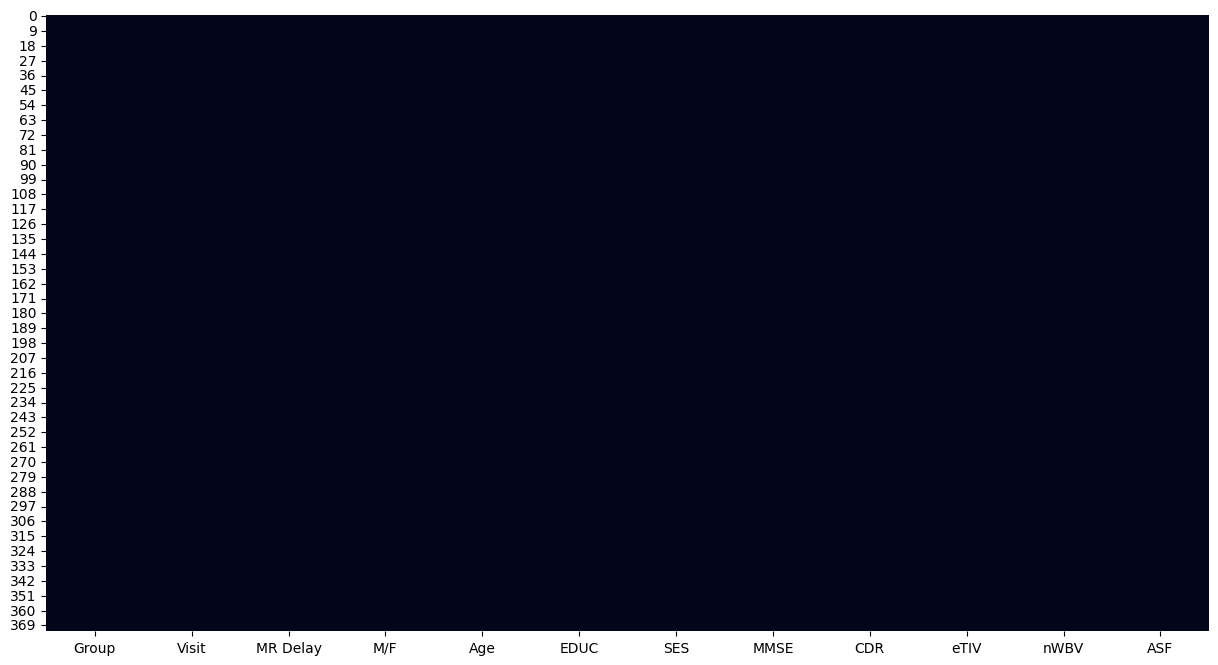

In [79]:
sns.heatmap(data=df_dementia.isnull(),cbar=False)

<span style="color:purple;font-size:1.4em;"><b>Para siguiente paso:</b> </span>
<b>Ahora no faltan valores para que podamos avanzar</b>

<b> Comprobación de valores atípicos
    

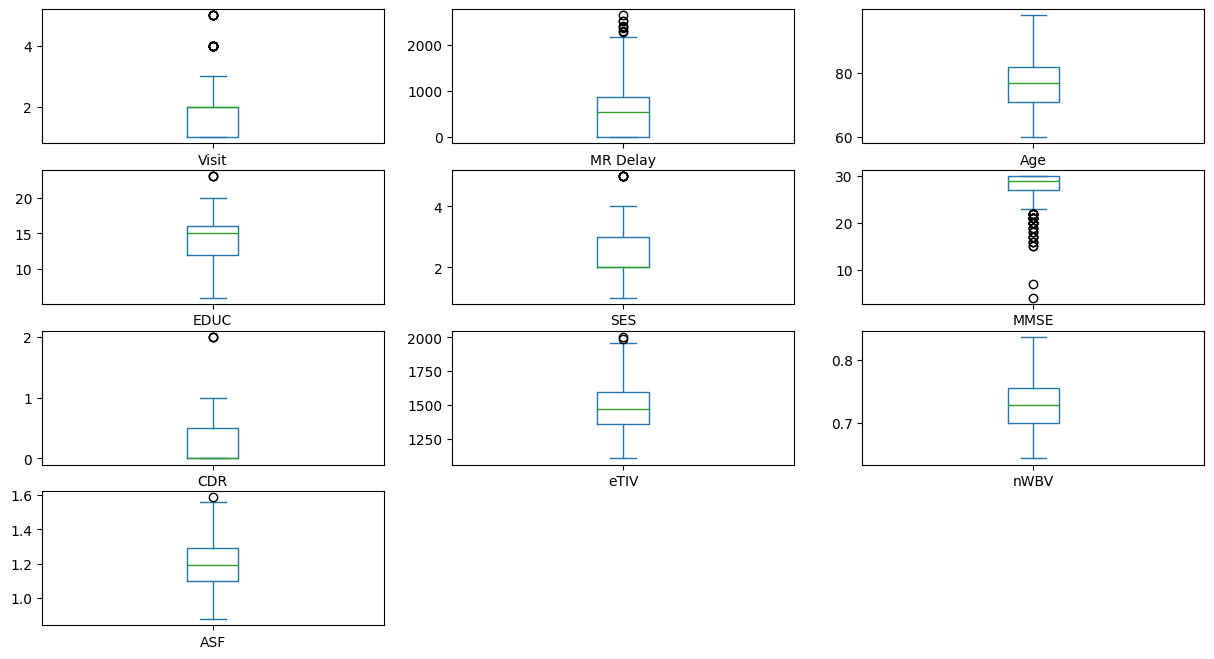

In [80]:
df_dementia.plot(kind='box',subplots=True,layout=(4,3))
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>Todas las columnas tienen valores atípicos excepto nWBV y Edad</b>

# Análisis exploratorio de datos

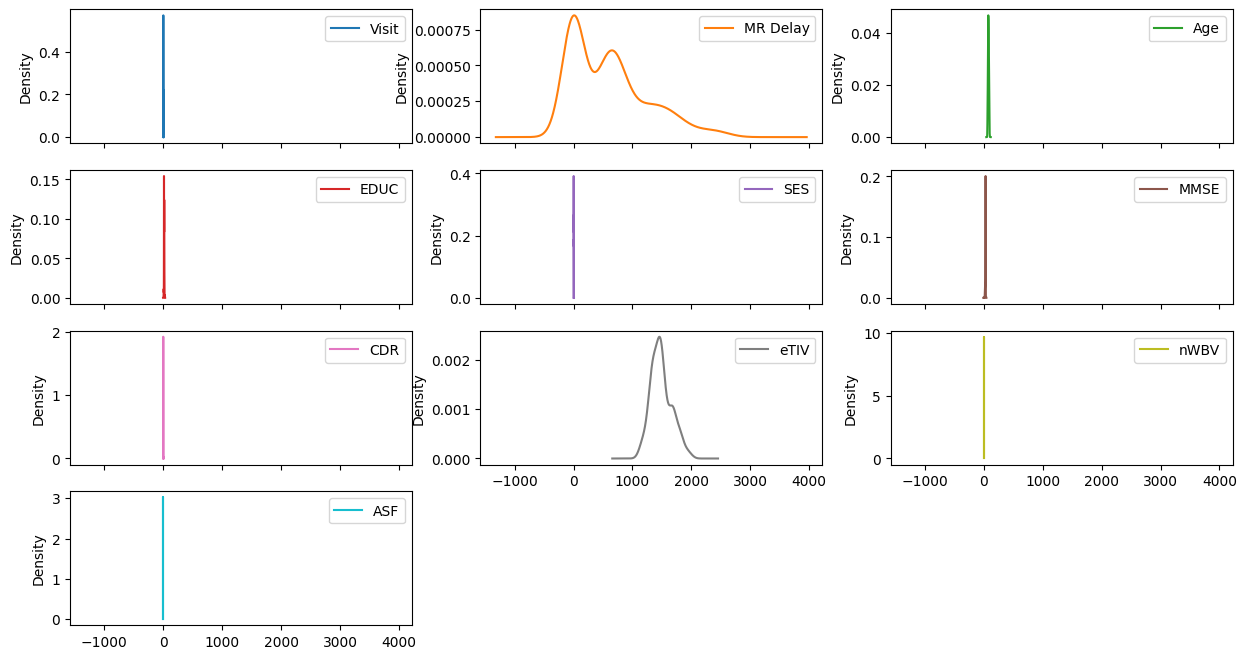

In [81]:
df_dementia.plot(kind='density',subplots=True,layout=(4,3))
plt.show()

In [82]:
def plot_piechart(var):
  plt.figure(figsize=(14,7))
  plt.subplot(121)
  label_list = df_dementia1[var].unique().tolist()
  df_dementia1[var].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 60,labels=label_list,
  wedgeprops={"linewidth":2})
  plt.title("Distribucion de Variable "+ var)



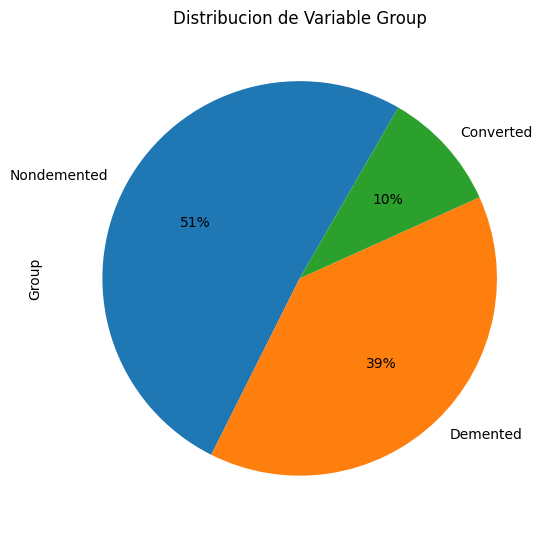

In [83]:
plot_piechart('Group')

<span style="color:purple;font-size:1.4em;"><b>Resumen:</b> </span>
<b>49% de ellos son dementes</b>

<b>Así que analizamos las características numéricas y realizamos un análisis univariado de esas características para ver si encontramos algún patrón o alguna información interesante.
Entonces, primero comenzamos con el análisis de la característica categórica más importante, es decir, la Clasificación clínica de demencia (CDR).</b>

In [84]:
df_dementia1.Group.describe()

count             373
unique              3
top       Nondemented
freq              190
Name: Group, dtype: object

In [85]:
df_dementia1['CDR'].describe()

count   373.000000
mean      0.290885
std       0.374557
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max       2.000000
Name: CDR, dtype: float64

<span style="color:purple;font-size:1.4em;"><b>Declaracion:</b> </span>
<b>Esta puntuación es útil para caracterizar y rastrear el nivel de demencia de un paciente:<br>

0 = Normal<br>
0,5 = demencia muy leve o cuestionable<br>
1 = demencia leve<br>
2 = Demencia moderada<br>
3 = demencia grave<br></b>

In [86]:
df_dementia1.CDR.describe()

count   373.000000
mean      0.290885
std       0.374557
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max       2.000000
Name: CDR, dtype: float64

In [87]:
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(18,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    result = df_dementia1.groupby(cat).apply (lambda group: (group.CDR == 'Normal').sum() / float(group.CDR.count())).to_frame('Normal')
    result['Dementia'] = 1 -result.Normal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1, grid=True)
    ax1.set_title('Graficas de barra de '+ cat +' (en %)', fontsize=14)
    ax1.set_ylabel('% Estado de demencia (Normal vs Demencia)')
    ax1.legend(loc="lower right")
    group_by_stat = df_dementia1.groupby([cat, 'CDR']).size()
    group_by_stat.unstack().plot(kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_title('Graficas de barra de '+ cat +' (en %)', fontsize=14)
    ax2.set_ylabel('Numero de Casos')
    plt.show()



# Característica de categorización CDR
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                        # Como no tenemos casos de demencia severa CDR score=3
        return 'Dementia'



<AxesSubplot: xlabel='CDR', ylabel='count'>

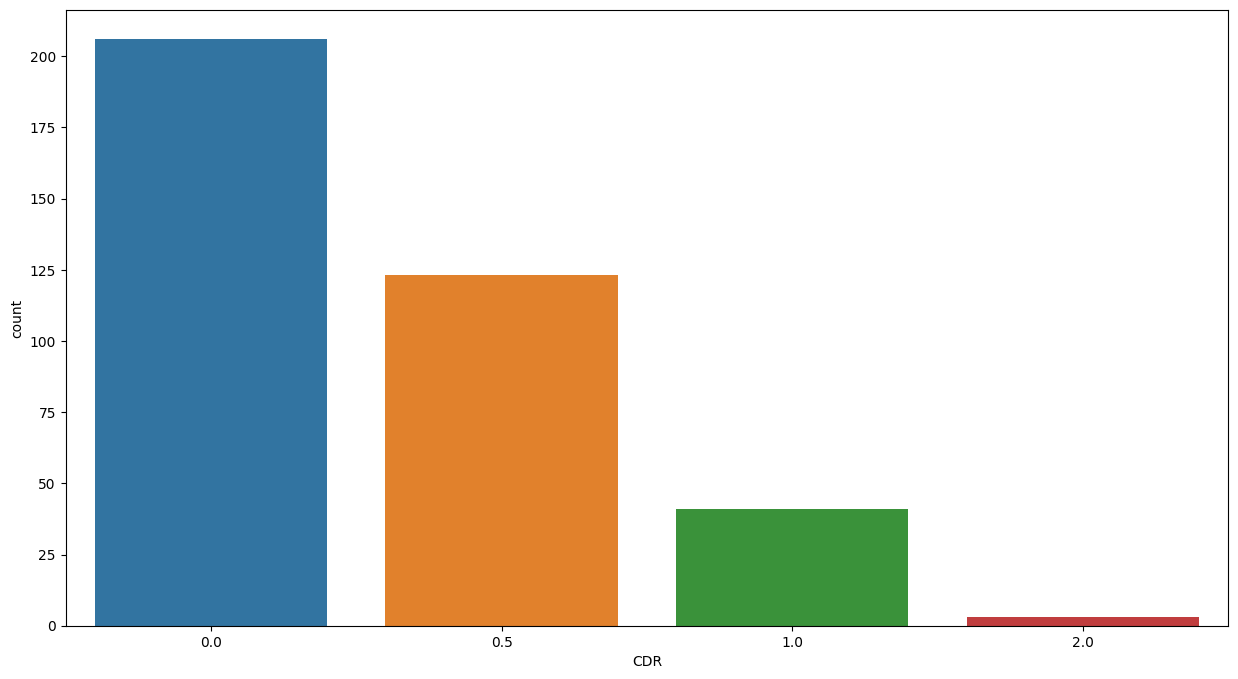

In [88]:
sns.countplot(x='CDR',data=df_dementia1)

<span style="color:purple;font-size:1.4em;"><b>Explicacion:</b> </span><b> El valor de CDR de 0 es más alto que el resto de ellos.</b>

In [89]:
df_dementia1['CDR'] = df_dementia1['CDR'].apply(lambda x: cat_CDR(x))

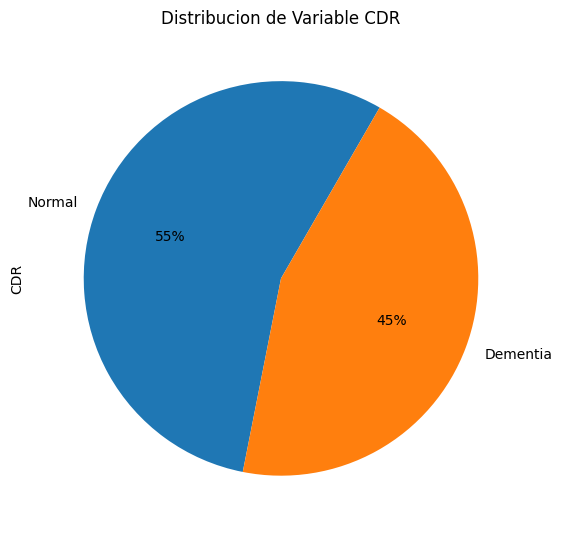

In [90]:
plot_piechart('CDR')

<span style="color:purple;font-size:1.4em;"><b>Continuamos con:</b> </span><b> Distribución de la variable CDR.</b>

In [91]:
df_dementia1['MMSE'].describe()

count   373.000000
mean     27.351206
std       3.675329
min       4.000000
25%      27.000000
50%      29.000000
75%      30.000000
max      30.000000
Name: MMSE, dtype: float64

In [92]:
df_dementia1.MMSE.value_counts()

30.000000    114
29.000000     93
28.000000     45
27.000000     32
26.000000     20
25.000000     12
21.000000     11
23.000000     11
22.000000      7
20.000000      7
17.000000      5
24.000000      4
16.000000      3
19.000000      3
15.000000      2
18.000000      2
7.000000       1
4.000000       1
Name: MMSE, dtype: int64

Text(0.5, 1.0, 'Gráfico de recuento para valores MMSE')

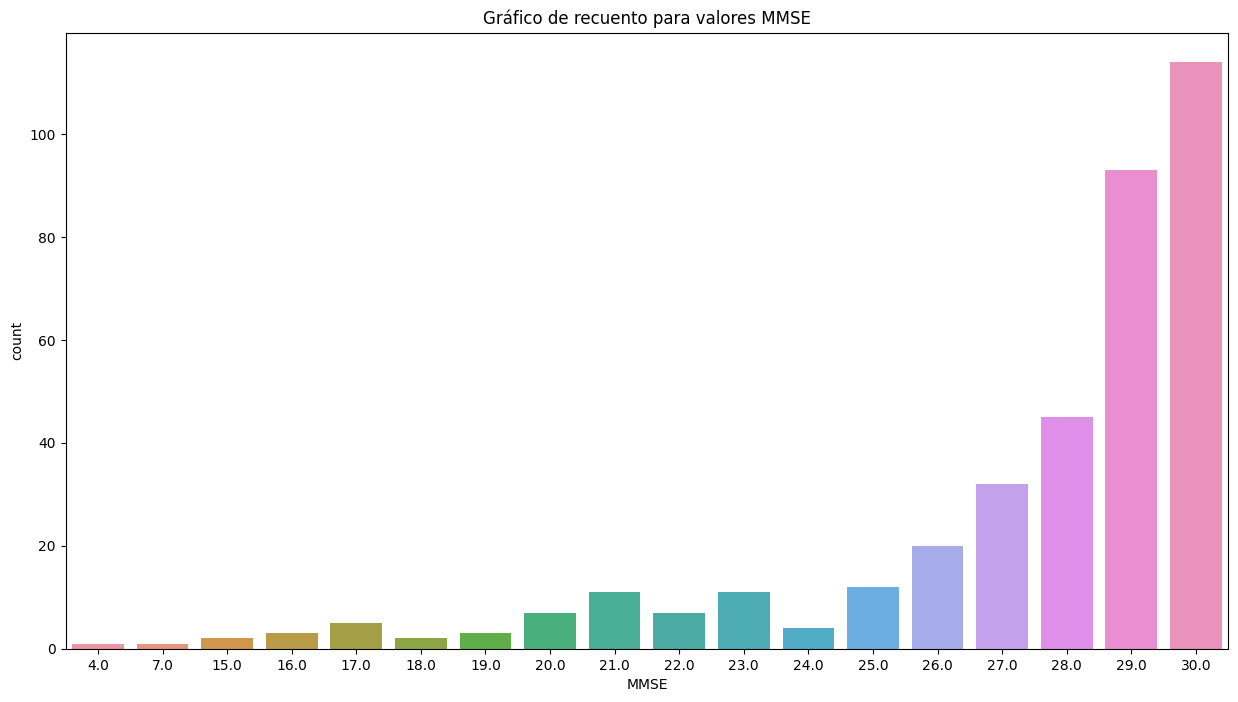

In [93]:
sns.countplot(x='MMSE',data=df_dementia1)
plt.title("Gráfico de recuento para valores MMSE")

<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span> <b>Los valores MMSE de 30 tienen el conteo más alto.</b>

In [94]:
def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9:
        return 'Severo'
    elif n >= 10 and n <= 18:
        return 'Moderado'
    elif n >= 19 and n <= 23:                                   
        return 'Leve'



In [95]:
df_dementia1['MMSE'] = df_dementia1['MMSE'].apply(lambda x: cat_MMSE(x))

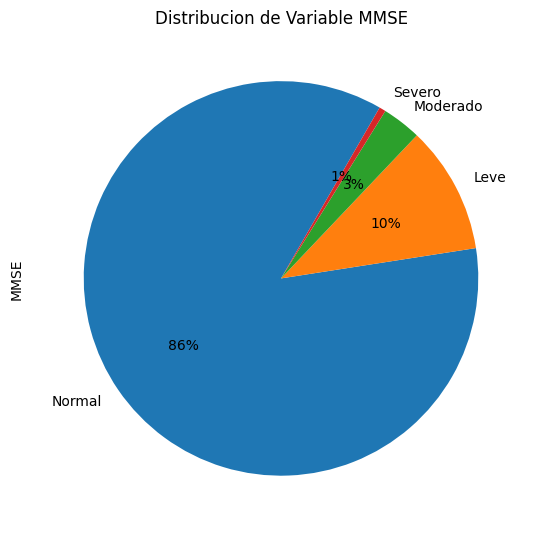

In [96]:
plot_piechart('MMSE')


<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span> <b>El MMSE normal es el más alto con un 86 %.</b>

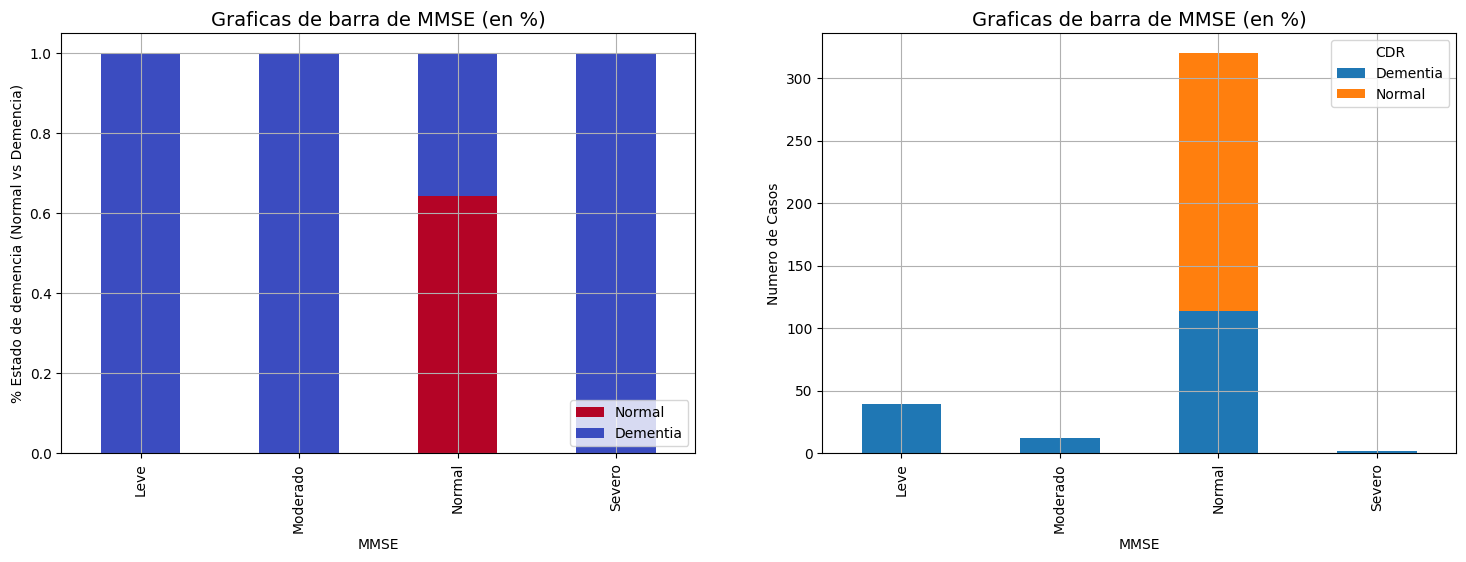

In [97]:
univariate_percent_plot('MMSE')

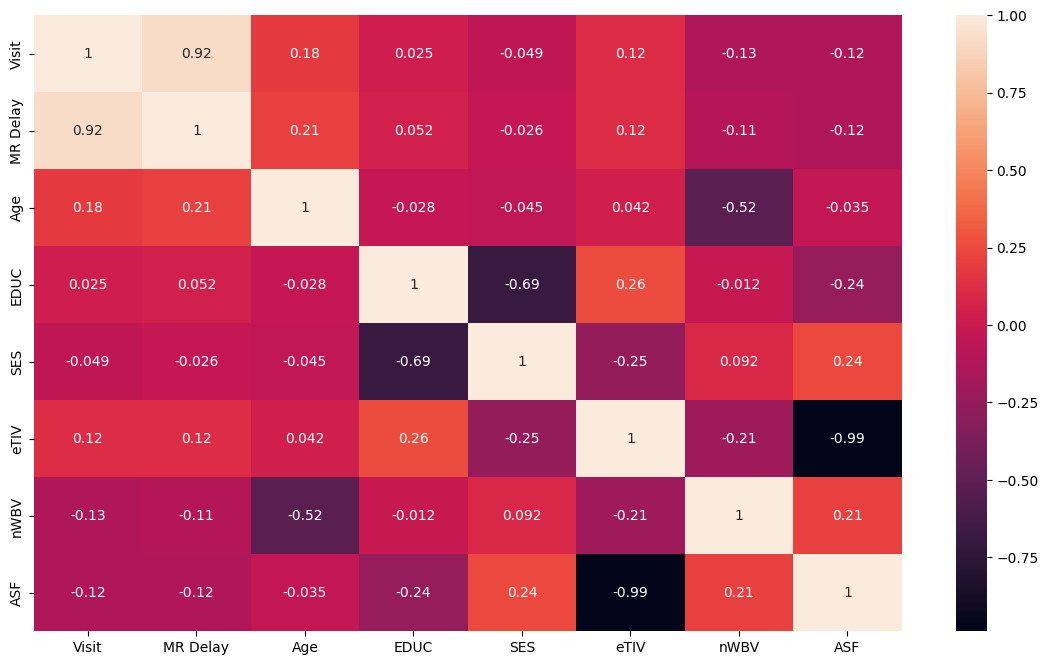

In [98]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_dementia1.corr(), annot=True)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>Como podemos ver, Visit y MR Delay muestran una estrecha correlación con 0,92.</b>
<b>Como podemos ver en el gráfico anterior, hay alrededor del 40 % de los casos en estado MMSE normal que son casos de demencia según la puntuación CDR.<b>
    

<b>A continuación, analizaremos la función Edad para ver cómo la edad afecta el estado de demencia.</b>

In [99]:
df_dementia.Age.describe()

count   373.000000
mean     77.013405
std       7.640957
min      60.000000
25%      71.000000
50%      77.000000
75%      82.000000
max      98.000000
Name: Age, dtype: float64

<AxesSubplot: ylabel='count'>

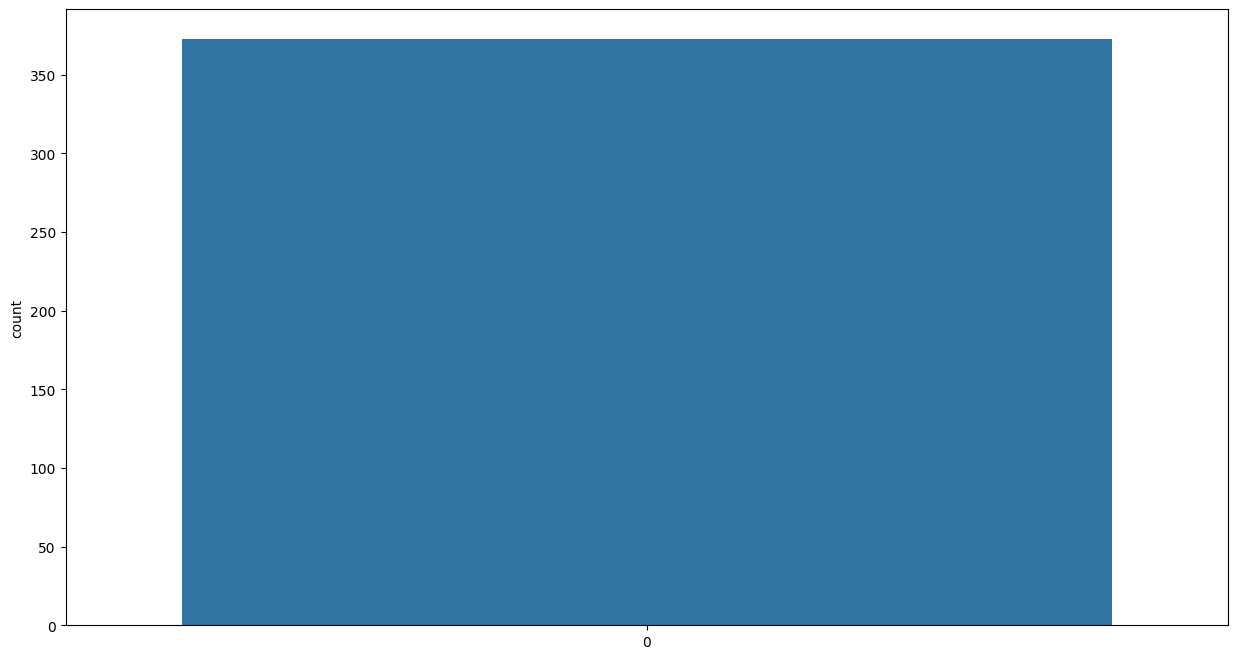

In [100]:
sns.countplot(df_dementia['Age'])

<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span><b> La mayoría de las personas tienen 73 años.</b>

In [101]:
df_dementia1['age_group'] = pd.cut(df_dementia1['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])
df_dementia1['age_group'].value_counts()

70-80     173
80-90     107
60-70      75
90-100     16
Name: age_group, dtype: int64

<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span><b> El grupo de edad de 70 a 80 años tiene el conteo más alto.</b>

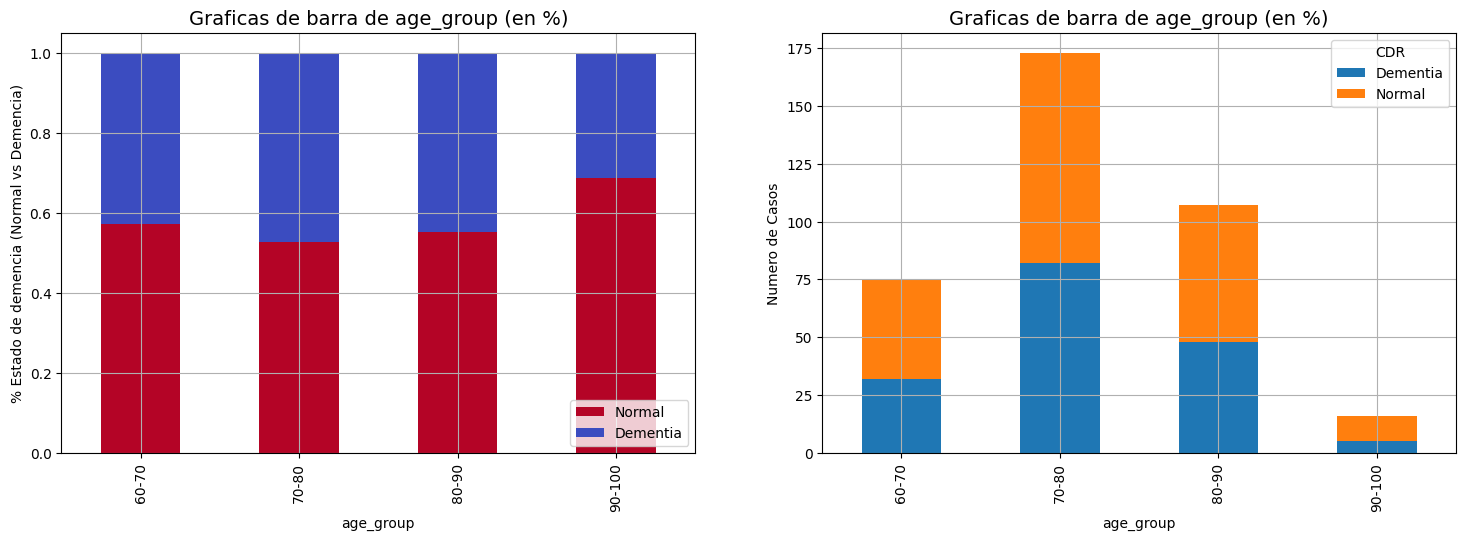

In [102]:
# Ahora trazando el grupo de edad para ver la distribución de la demencia
univariate_percent_plot('age_group')

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span><b> Casi la mitad de las personas en el grupo de edad de 70 a 80 años están dementes. </b>

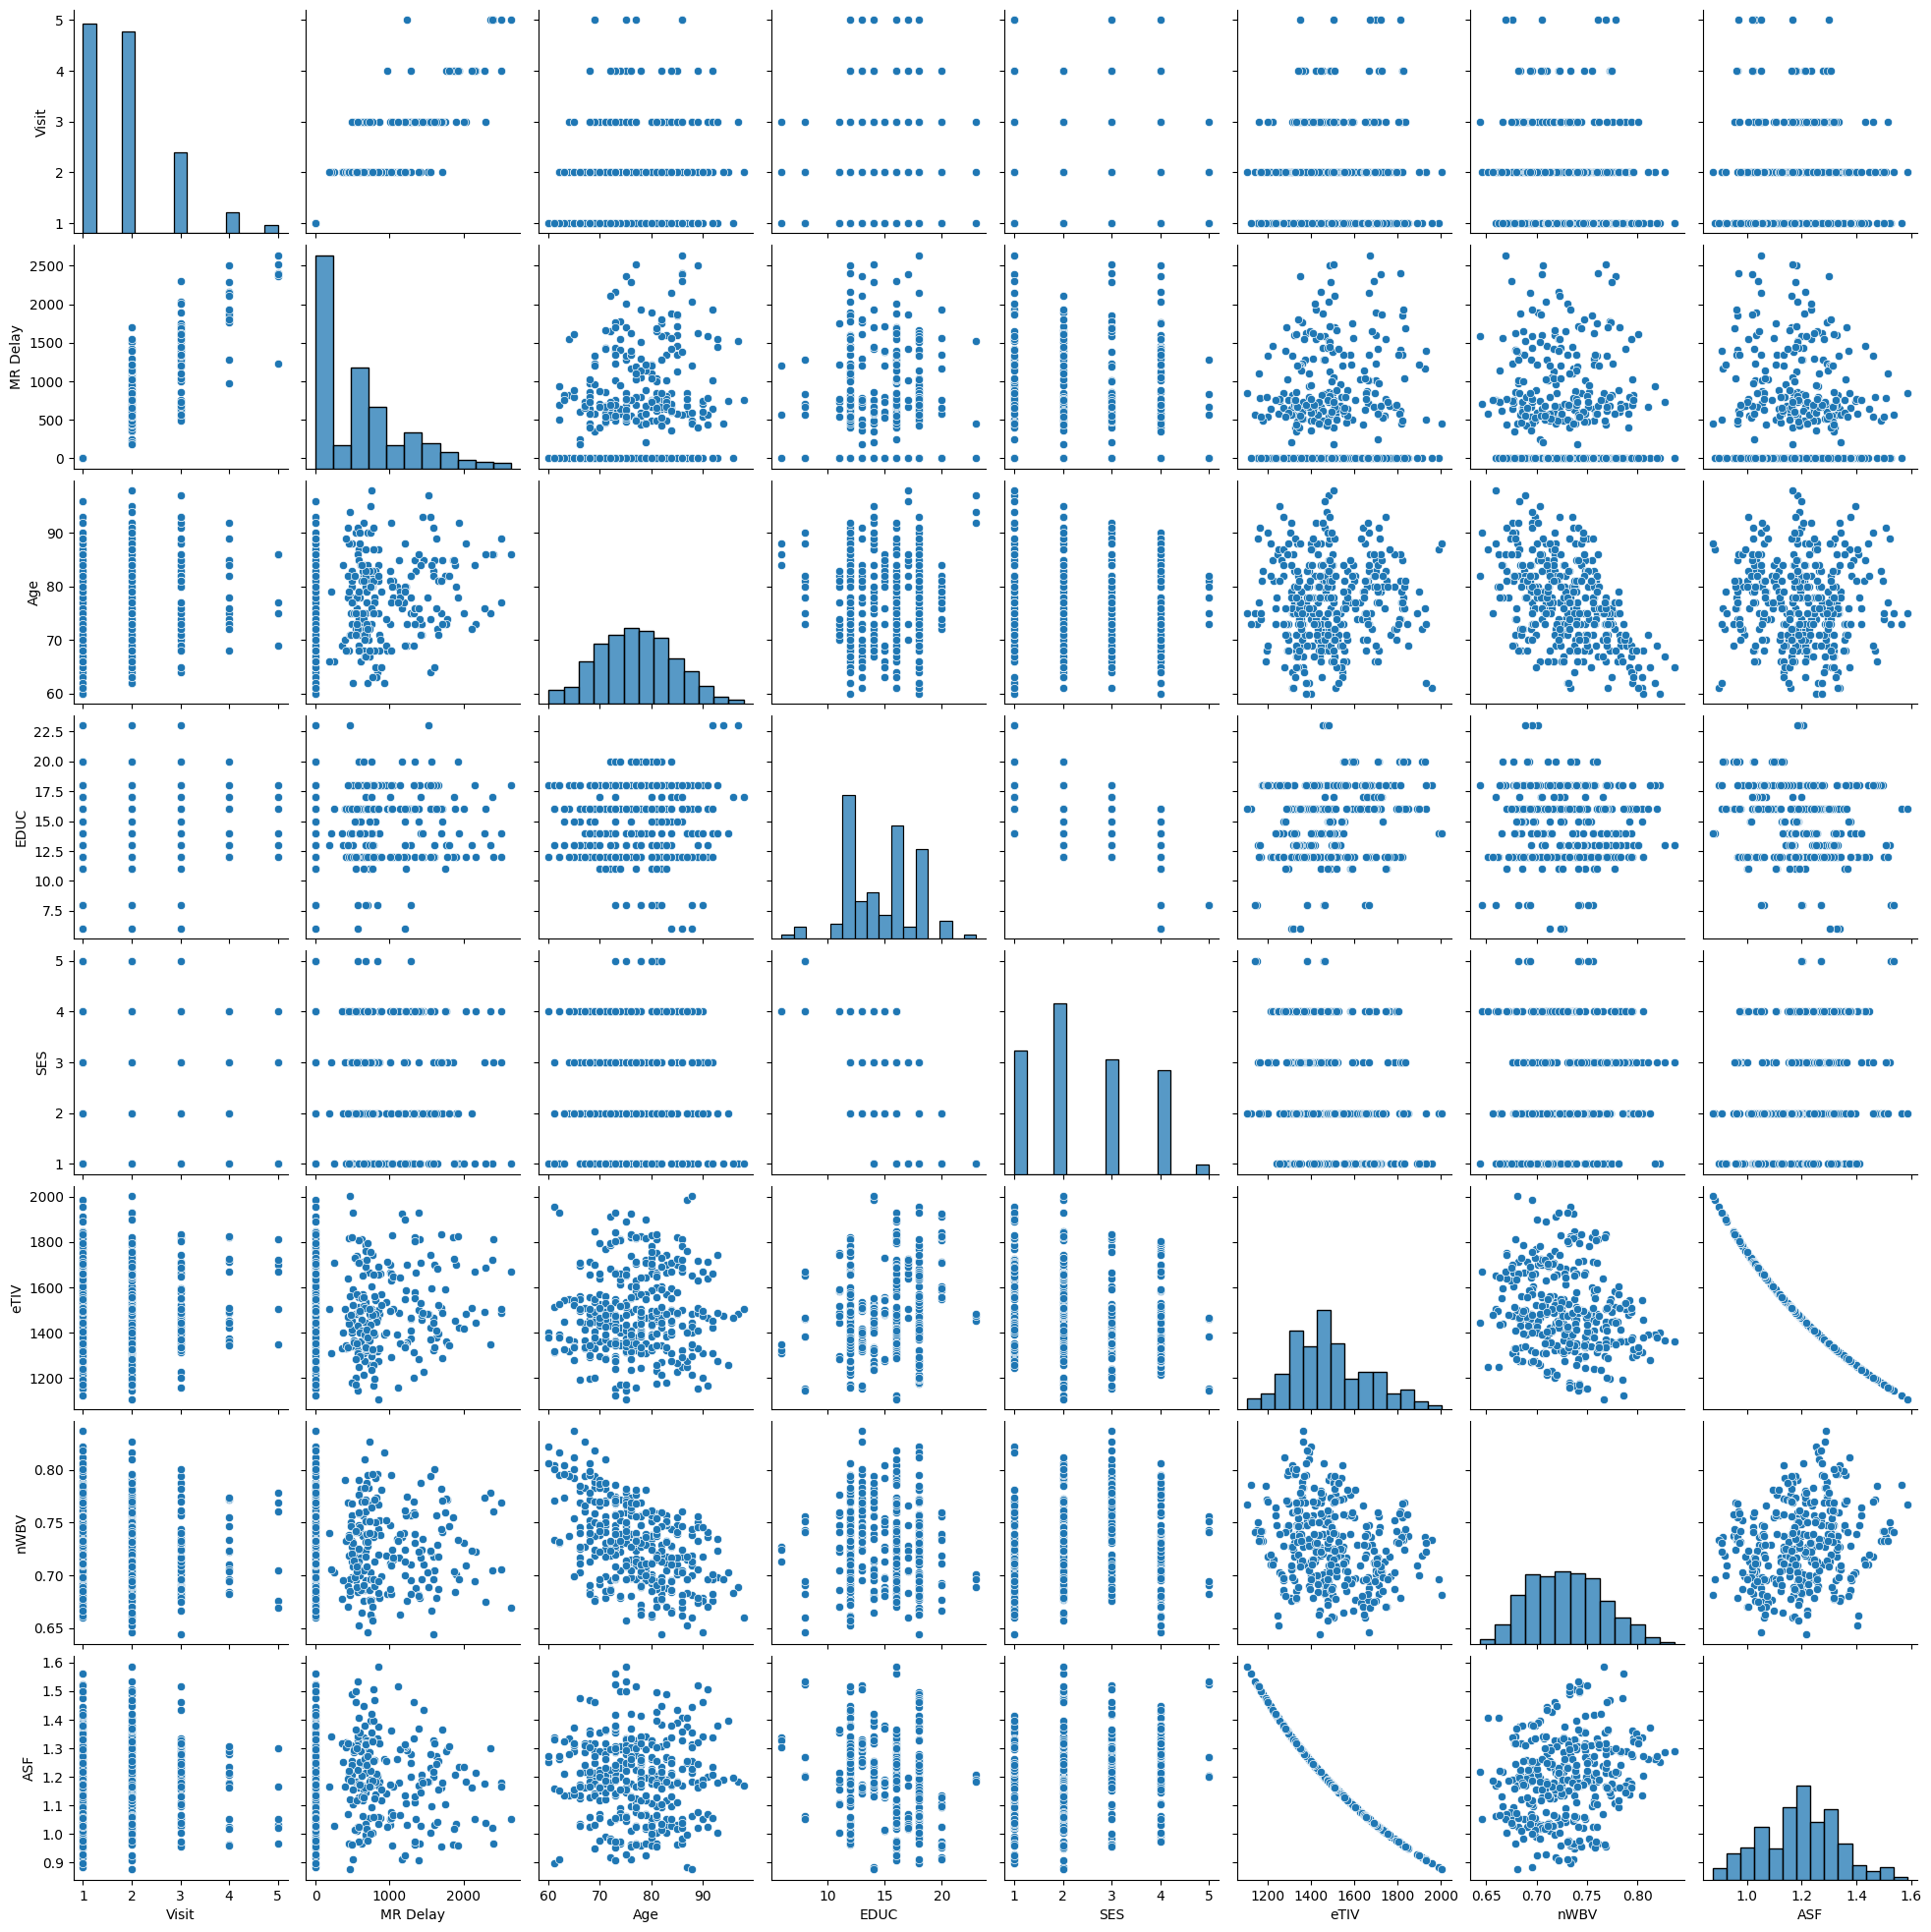

In [103]:
sns.pairplot(df_dementia)
plt.show()

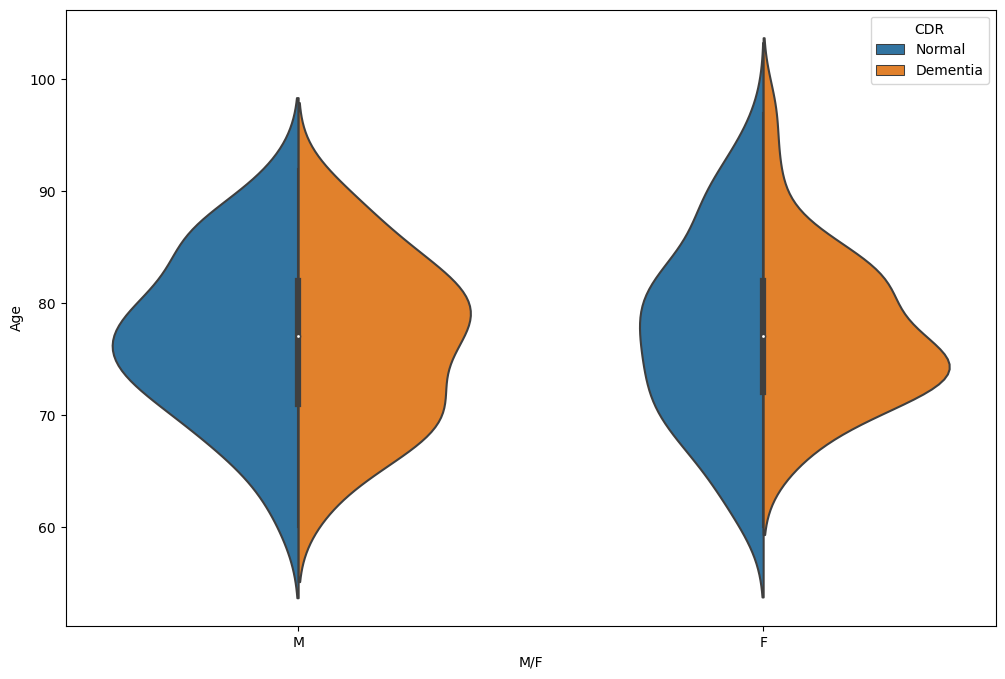

In [104]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="Age",hue="CDR",split=True, data=df_dementia)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>

<b>Como podemos observar en el gráfico anterior, en el caso de los hombres, la mayoría de los casos de demencia se notifican alrededor de los 80 años, mientras que en el caso de las mujeres, la demencia prevalece a los 75 años. Una observación más sugiere que en el caso de los hombres, la demencia comienza temprano, incluso antes de los 60 años, mientras que en el caso de las mujeres, la demencia generalmente ocurre después de los 60 años.

A continuación, analizaremos otra característica importante llamada eTIV.</b>

In [105]:
df_dementia['eTIV'].describe()

count    373.000000
mean    1488.128686
std      176.139286
min     1106.000000
25%     1357.000000
50%     1470.000000
75%     1597.000000
max     2004.000000
Name: eTIV, dtype: float64

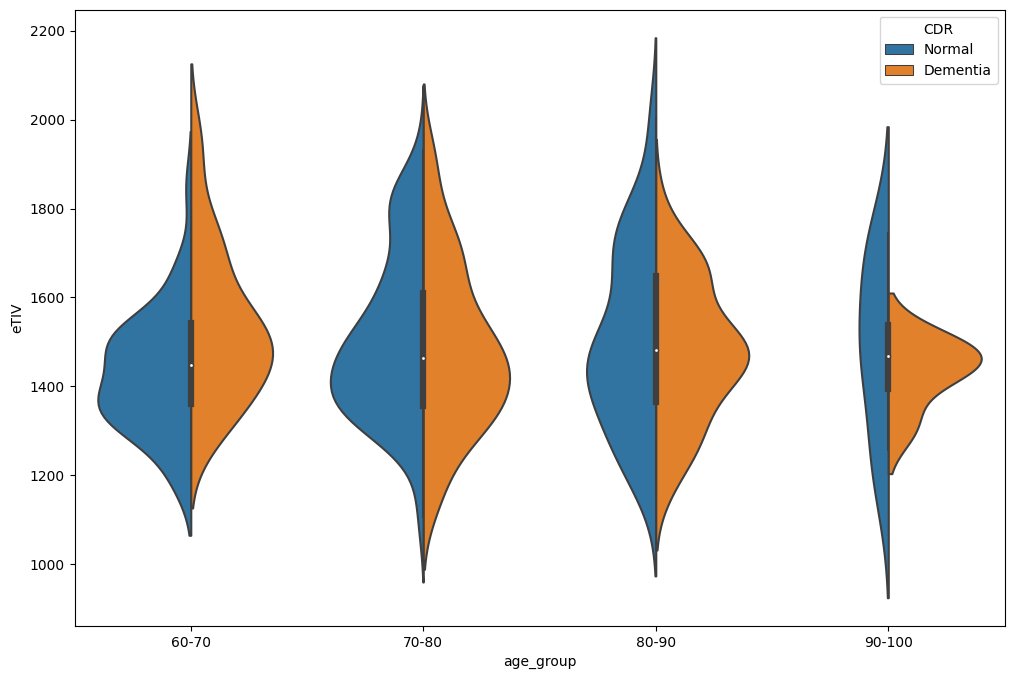

In [106]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="age_group", y="eTIV",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>

<b>Como podemos observar en el gráfico anterior, en el caso de los hombres, la mayoría de los casos de demencia se notifican alrededor de los 80 años, mientras que en el caso de las mujeres, la demencia prevalece a los 75 años. Una observación más sugiere que en el caso de los hombres, la demencia comienza temprano, incluso antes de los 60 años, mientras que en el caso de las mujeres, la demencia generalmente ocurre después de los 60 años.

A continuación, analizaremos otra característica importante llamada eTIV.</b>

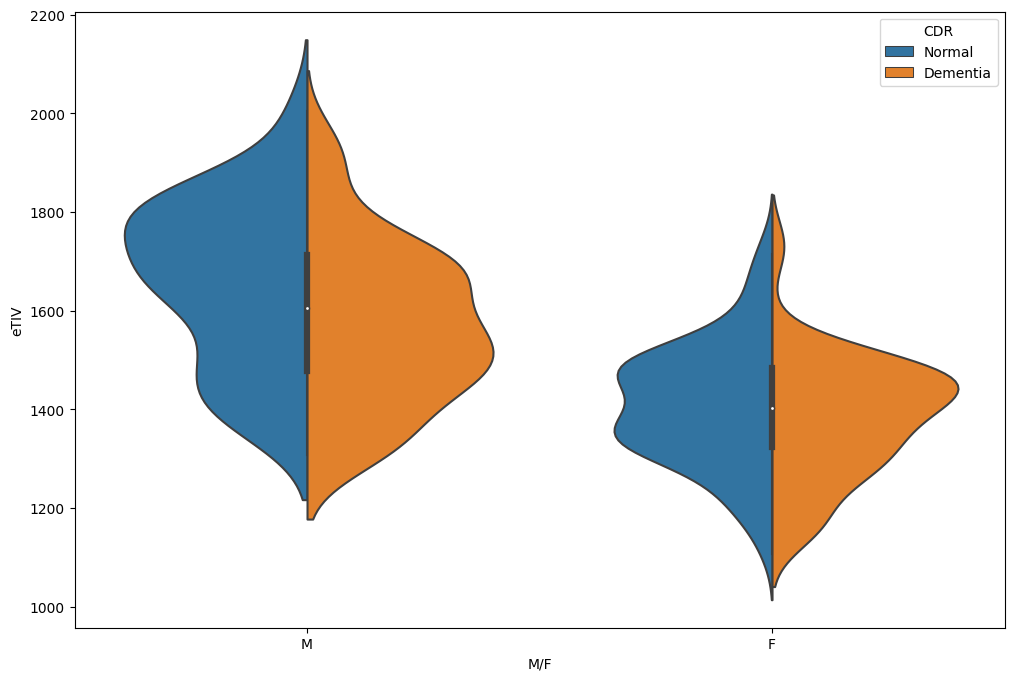

In [107]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>Volumen normalizado de todo el cerebro, expresado como porcentaje de todos los vóxeles en la imagen enmascarada de atlas que están etiquetados como materia gris o blanca por el proceso automatizado de segmentación de tejido.</b>

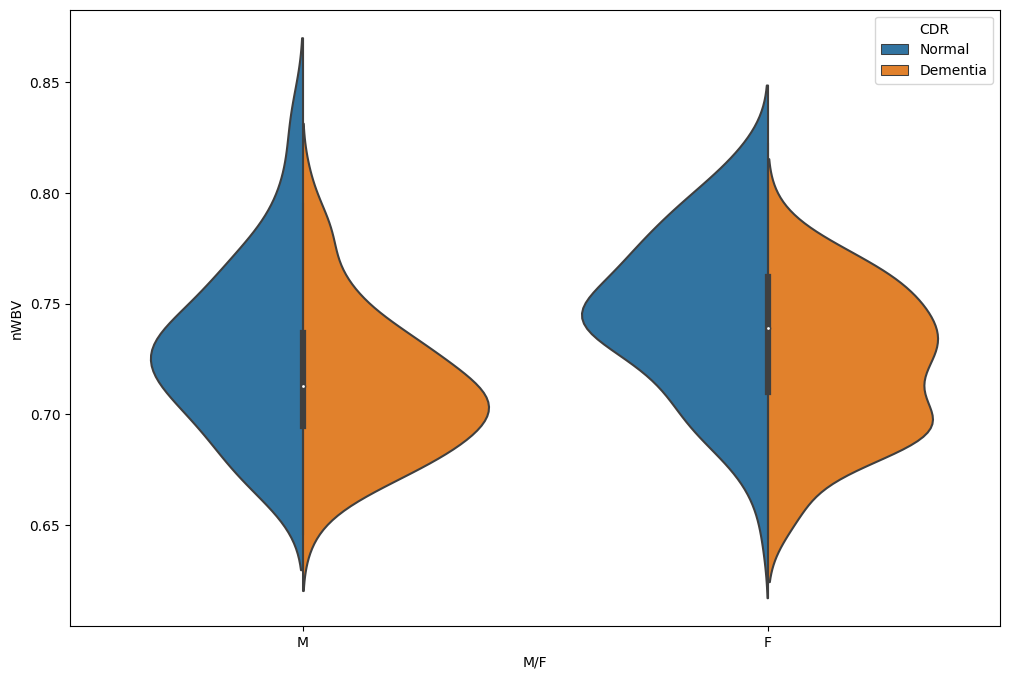

In [108]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="nWBV",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>El nWBV de macho y hembra es diferente. Para los hombres, las personas dementes tienen un nWBV alto entre 0,65 y 0,75.</b>

In [109]:
df_dementia['EDUC'].describe()

count   373.000000
mean     14.597855
std       2.876339
min       6.000000
25%      12.000000
50%      15.000000
75%      16.000000
max      23.000000
Name: EDUC, dtype: float64

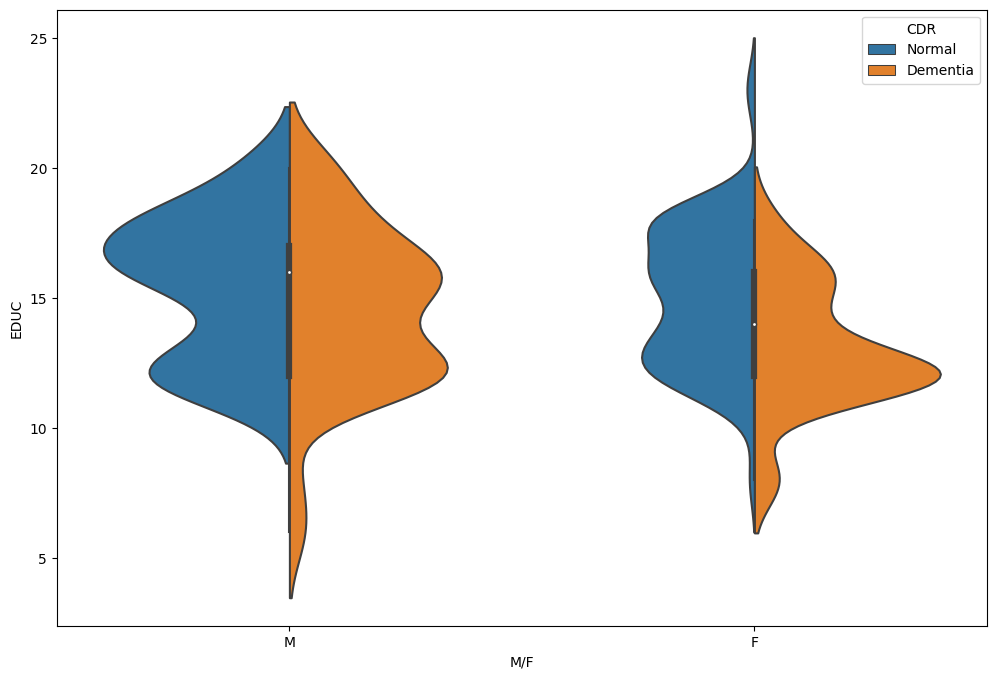

In [110]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="EDUC",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>Como podemos observar en el gráfico anterior, los hombres que tienen un nivel de educación entre 10 y 17 años tienen un mayor nivel de casos de demencia y los hombres comenzaron a mostrar síntomas de dimentia con menos niveles de educación a partir de los 4 años, mientras que las mujeres comenzaron a mostrar síntomas de dimentia después de los 6 años. de nivel de educación que tiene el pico más alto a los 13 años de edad.</b>

In [111]:
df_dementia['SES'].describe()

count   373.000000
mean      2.436997
std       1.109307
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: SES, dtype: float64

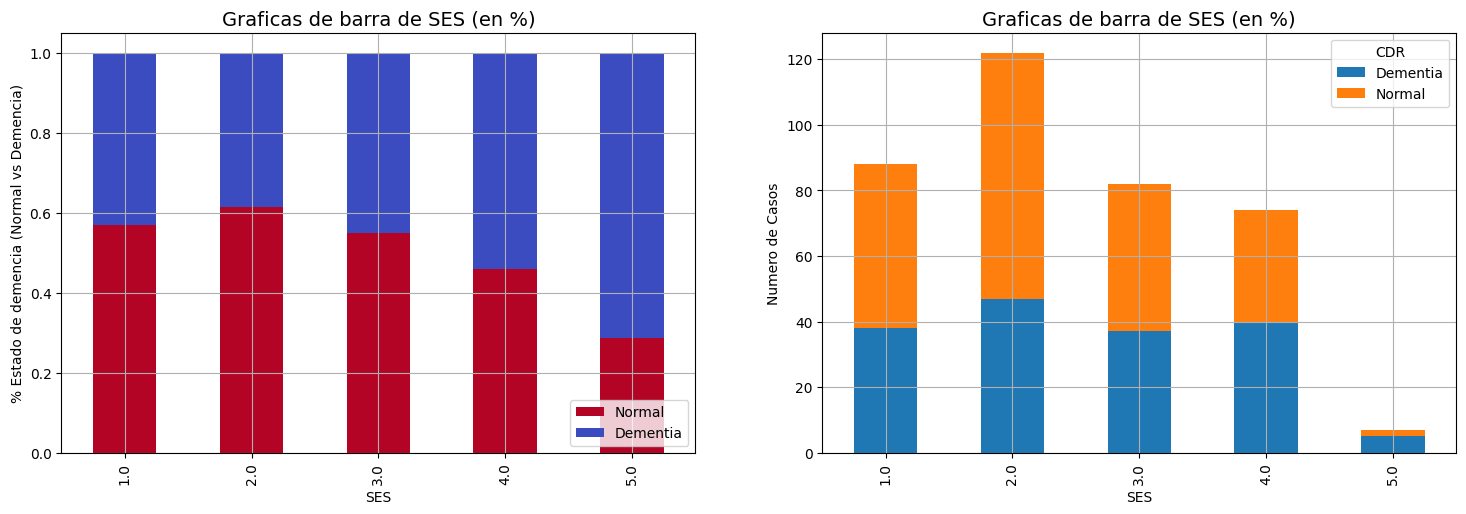

In [112]:

univariate_percent_plot('SES')

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>En el nivel más bajo de estatus socioeconómico existe una probabilidad más alta de demencia que puede deberse a una condición económica más baja que resulta en depresión, sufrimientos que a su vez resultan en demencia.</b>

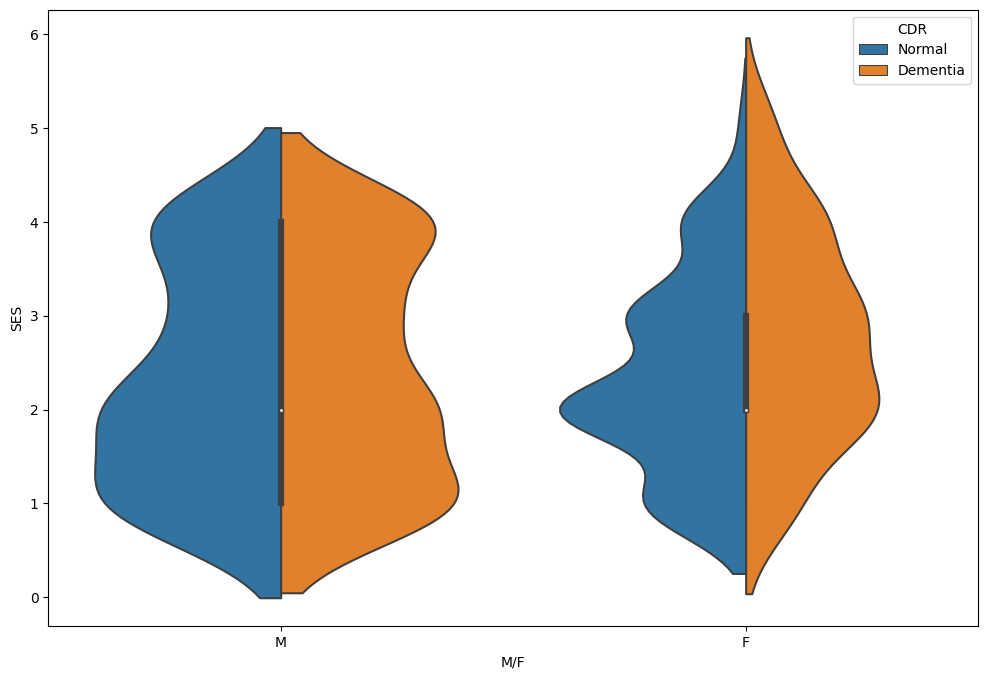

In [113]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="SES",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>Patrón interesante observado en el gráfico anterior que en los hombres hay dos picos de casos de demencia más altos, uno en 1 (estado más alto) y 4 (estado más bajo) y entre 1 y 4 hay menos casos de casos de demencia mientras que en el caso de el pico más alto de las mujeres está en 2, mientras que en 1 y 5 se informan un poco menos de casos de demencia.
Sugiere que las mujeres tienen menos probabilidad de demencia en el nivel socioeconómico más alto y más bajo, mientras que los hombres tienen exactamente el fenómeno opuesto.</b>

<b>ASF: factor de escala de Atlas (sin unidades). Factor de escala calculado que transforma el cerebro y el cráneo del espacio nativo en el objetivo del atlas (es decir, el determinante de la matriz de transformación)</b>

In [114]:
df_dementia['ASF'].describe()

count   373.000000
mean      1.195461
std       0.138092
min       0.876000
25%       1.099000
50%       1.194000
75%       1.293000
max       1.587000
Name: ASF, dtype: float64

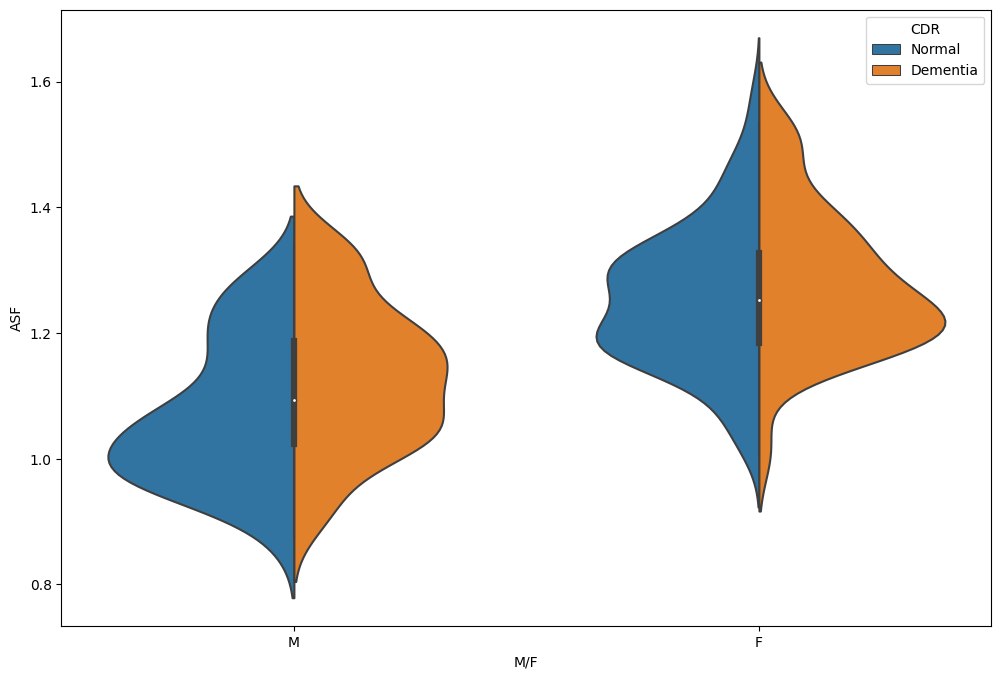

In [115]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="ASF",hue="CDR",split=True, data=df_dementia1)
plt.show()

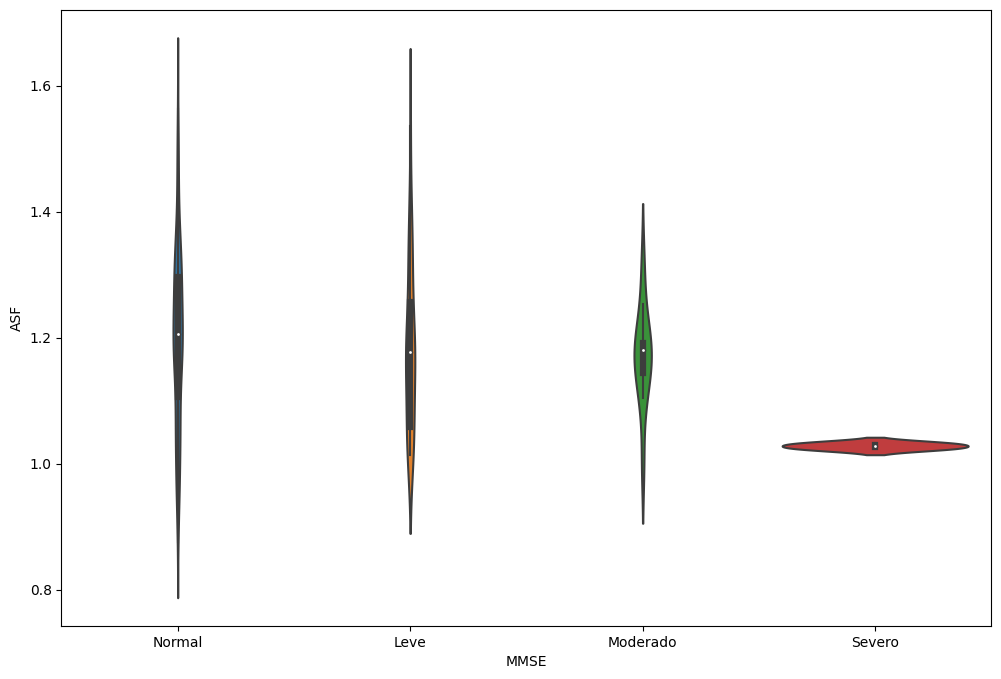

In [116]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="ASF",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>De la gráfica anterior podemos obtener la intuición sobre ASF como en el caso de pacientes normales el valor de ASF se distribuyó entre 0.8 y 1.6 pero cuando los pacientes comenzaron a mostrar casos de demencia su valor se centró alrededor de 1 como en el caso de Leve, Moderado y Grave se reduce a 1,1</b>



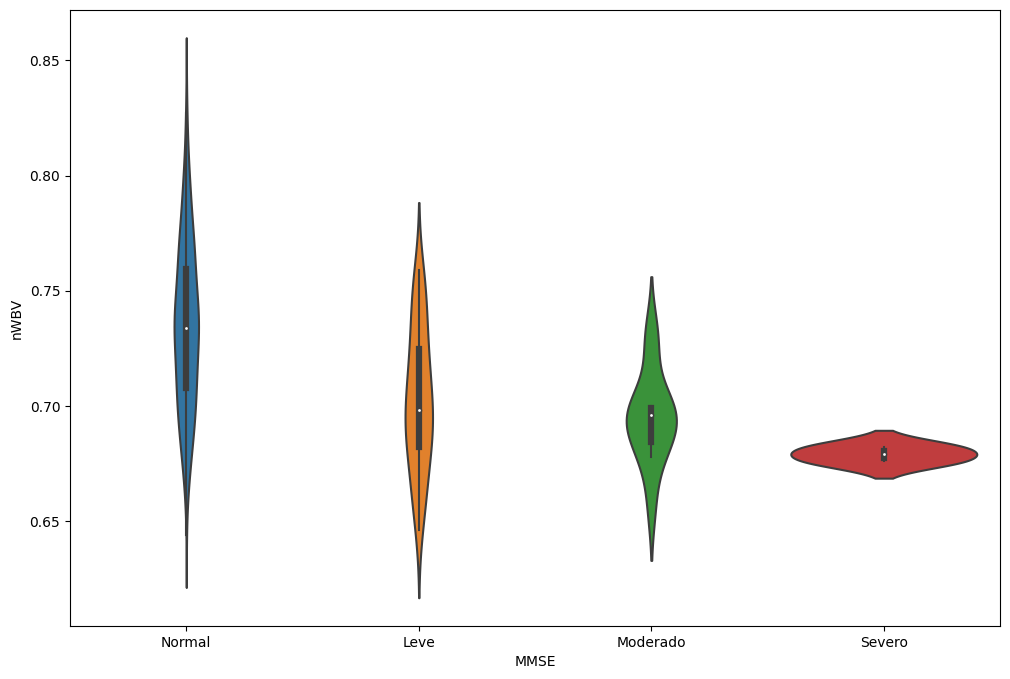

In [117]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="nWBV",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>Mismo patrón observado en caso de nWBV a medida que el nivel de demencia aumenta centrado entre 0,65 y 0,70.</b>

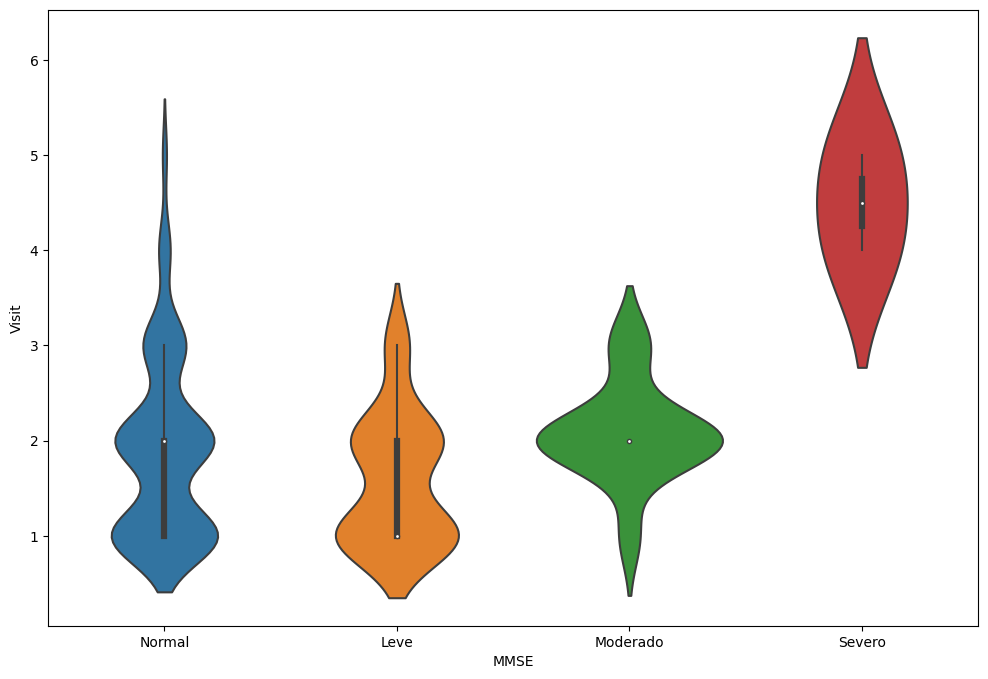

In [118]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="Visit",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>Los casos de demencia grave comienzan a informarse cuando el número de visitas aumenta a más de 3, mientras que los casos normales también se informan después de un mayor número de visitas a más de 3, pero son muy pocos en número.</b>

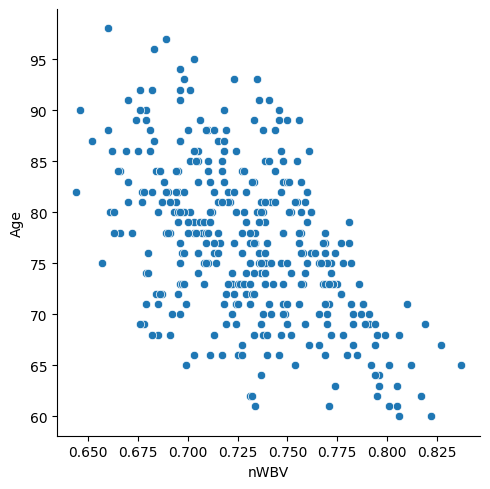

In [119]:
sns.relplot(x="nWBV", y="Age", data=df_dementia1);

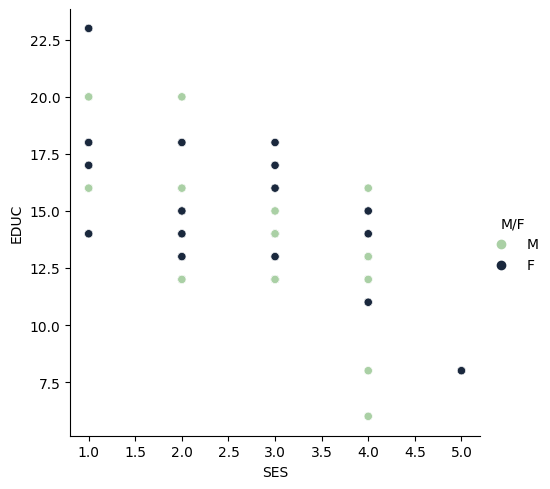

In [120]:
sns.relplot(x="SES", y="EDUC", hue="M/F", palette="ch:r=-.5,l=.75", data=df_dementia1);

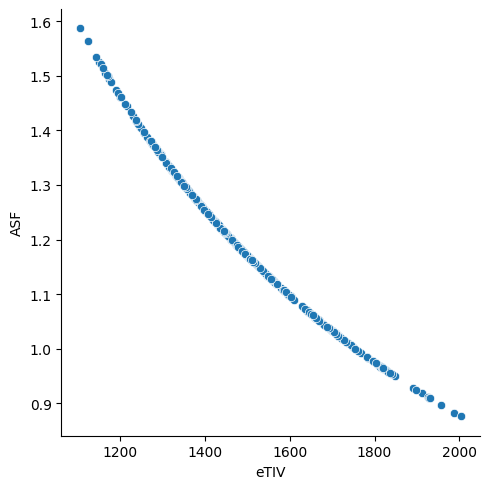

In [121]:
sns.relplot(x="eTIV", y="ASF", palette="ch:r=-.5,l=.75", data=df_dementia1);

<AxesSubplot: title={'center': 'Grafico de Barras'}, xlabel='Group'>

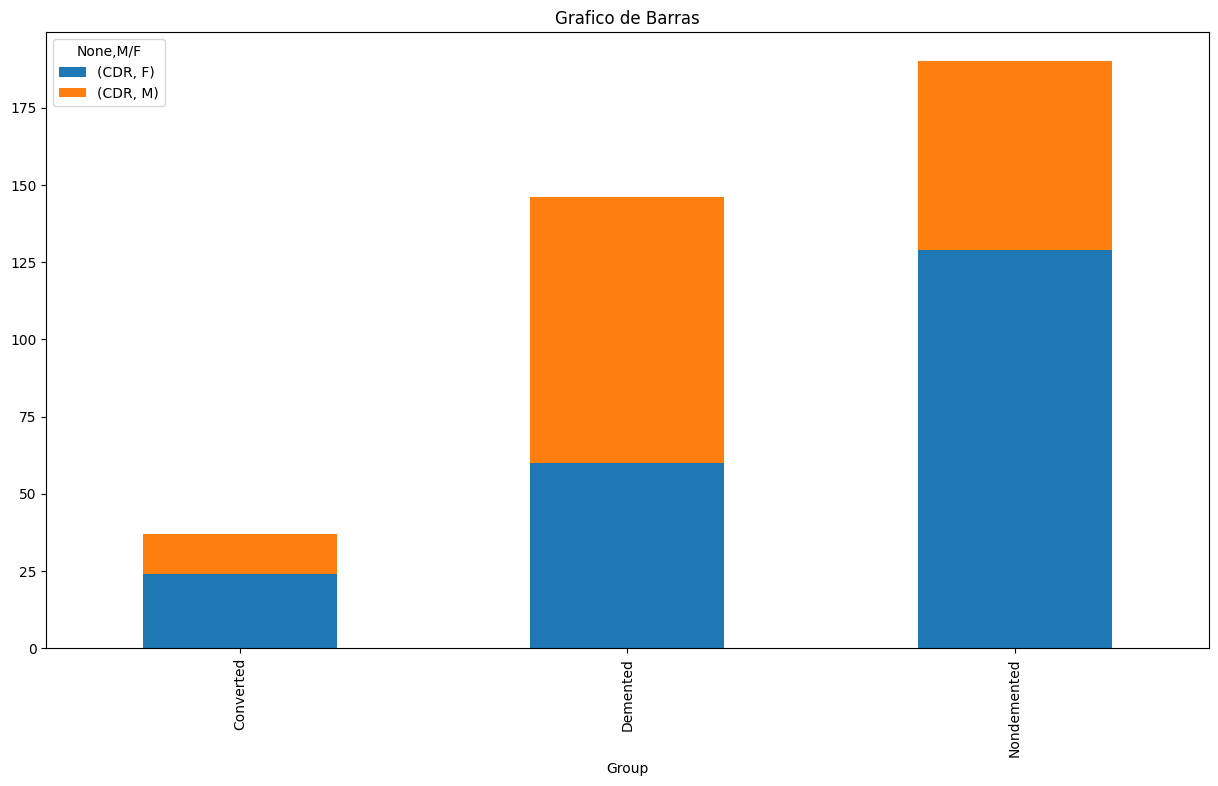

In [122]:
stack=pd.pivot_table(df_dementia1,index=['Group'],columns=['M/F'],values=['CDR'],aggfunc='count')
stack.plot.bar(title='Grafico de Barras',stacked=True)

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>Los hombres son más propensos a la demencia</b>

In [123]:
df_dementia.drop(["Visit","MR Delay"],axis=1,inplace=True)

In [124]:
df_dementia["Group"].replace({"Nondemented":0,"Demented":1},inplace=True)

In [125]:
df_dementia["M/F"].replace({"M":0,"F":1},inplace=True)

In [126]:
df_dementia.head(5)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,age_group
0,0,0,87,14,2.000000,Normal,Normal,1987,0.696000,0.883000,80-90
1,0,0,88,14,2.000000,Normal,Normal,2004,0.681000,0.876000,80-90
2,1,0,75,12,2.000000,Leve,Dementia,1678,0.736000,1.046000,70-80
3,1,0,76,12,2.000000,Normal,Dementia,1738,0.713000,1.010000,70-80
4,1,0,80,12,2.000000,Leve,Dementia,1698,0.701000,1.034000,70-80


# Codificación de variables categóricas

In [127]:
df_cat=df_dementia[["MMSE","CDR"]]

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
encode=LabelEncoder()
df_cat["MMSE"]=encode.fit_transform(df_cat[["MMSE"]])
df_cat["CDR"]=encode.fit_transform(df_cat[["CDR"]])

In [130]:
df_dementia.drop(["MMSE","CDR"],axis=1,inplace=True)

In [131]:
df=pd.concat([df_dementia,df_cat],axis=1)

In [132]:
df.head(5)

,Group,M/F,Age,EDUC,SES,eTIV,nWBV,ASF,age_group,MMSE,CDR
0,0,0,87,14,2.000000,1987,0.696000,0.883000,80-90,2,1
1,0,0,88,14,2.000000,2004,0.681000,0.876000,80-90,2,1
2,1,0,75,12,2.000000,1678,0.736000,1.046000,70-80,0,0
3,1,0,76,12,2.000000,1738,0.713000,1.010000,70-80,2,0
4,1,0,80,12,2.000000,1698,0.701000,1.034000,70-80,0,0


In [133]:
df.drop(["age_group"],axis=1,inplace=True)

In [134]:
df.head(5)

,Group,M/F,Age,EDUC,SES,eTIV,nWBV,ASF,MMSE,CDR
0,0,0,87,14,2.000000,1987,0.696000,0.883000,2,1
1,0,0,88,14,2.000000,2004,0.681000,0.876000,2,1
2,1,0,75,12,2.000000,1678,0.736000,1.046000,0,0
3,1,0,76,12,2.000000,1738,0.713000,1.010000,2,0
4,1,0,80,12,2.000000,1698,0.701000,1.034000,0,0


In [135]:
df["Group"].replace({"Converted":1},inplace=True)

In [136]:
df["Group"].unique()

array([0, 1])

In [137]:
def scrore1(y_pred,y_test):
    cm = confusion_matrix(y_pred,y_test)
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    acc = (TN+TP)/(TN+FP+TP+FN)
    print("accuracy:",acc)
    precision = TP / (TP+FP)
    print("precision:",precision)
    recall = TP / (TP+FN)
    print("recall:",recall)
    f1_score = 2*((precision*recall)/(precision+recall))
    print("f1-score:",f1_score)

In [138]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap ="winter", cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})


    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [139]:
def plot_roc(model):

    y_pred_prob = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')


    plt.title('Curva ROC para detección de demencia', fontsize = 15)
    plt.xlabel('Tasa de falsos positivos (1-Especificidad)', fontsize = 15)
    plt.ylabel('Tasa de verdaderos positivos (Sensibilidad)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('Valores AUC:',round(roc_auc_score(y_test, y_pred),4)))

    # trazar la grilla
    plt.grid(True)

In [140]:
def get_train_report(model):
    
    train_pred = model.predict(X_train)

    # Devolver las medidas de rendimiento en el juego de trenes
    return(classification_report(y_train, train_pred))

In [141]:
def get_test_report(model):
    
    test_pred = model.predict(X_test)

    # Devolver las medidas de rendimiento en el conjunto de prueba
    return(classification_report(y_test, test_pred))

In [142]:
score_card = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'AUC Score', 'Precision', 'Recall',
                                       'F1-Score'])

def update_score_card(algorithm_name, model):
    
    global score_card

    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Accuracy': acc, 
                       'AUC Score': metrics.roc_auc_score(y_test, y_pred),
                       'Precision': precision, 
                       'Recall': recall,  
                       'F1-Score': f1_score}, ignore_index = True)

# Modelo de construcción


### <span style="color:Red;font-size:1.4em;"><b>REGRESIÓN LOGÍSTICA</b></span>

In [143]:
df["Group"].value_counts()

0    190
1    183
Name: Group, dtype: int64

<b>El conjunto de datos está equilibrado</b>

In [144]:
X=df.drop(["Group"],axis=1)
y=df["Group"]

In [145]:
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.112860
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      251
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.8372
Time:                        20:58:42   Log-Likelihood:                -29.456
converged:                       True   LL-Null:                       -180.89
Covariance Type:            nonrobust   LLR p-value:                 6.408e-60
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.6739     62.130      1.540      0.124     -26.099     217.447
M/F           -2.4755      1.289     -1.921      0.055      -5.001       0.050
Age            0.0512      0.066      0.770      0.441      -0.079       0.181
EDUC          -0.5169      0.278     -1.861      0.063      -1.061       0.028
SES           -1.9736      0.702     -2.811      0.005      -3.350      -0.598
eTIV          -0.0267      0.019     -1.378      0.168      -0.065       0.011
nWBV          -6.1006     15.808     -0.386      0.700     -37.083      24.882
ASF          -24.7324     23.328     -1.060      0.289     -70.454      20.989
MMSE          -2.6893     10.969     -0.245      0.806     -24.188      18.809
CDR           -9.9515      2.153     -4.621      0.000     -14.172      -5.731
==============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [146]:
y_pred=logreg.predict(X_test)

In [147]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [148]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

### Informe de clasificación

In [149]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        58
           1       0.92      0.85      0.88        54

    accuracy                           0.89       112
   macro avg       0.90      0.89      0.89       112
weighted avg       0.89      0.89      0.89       112



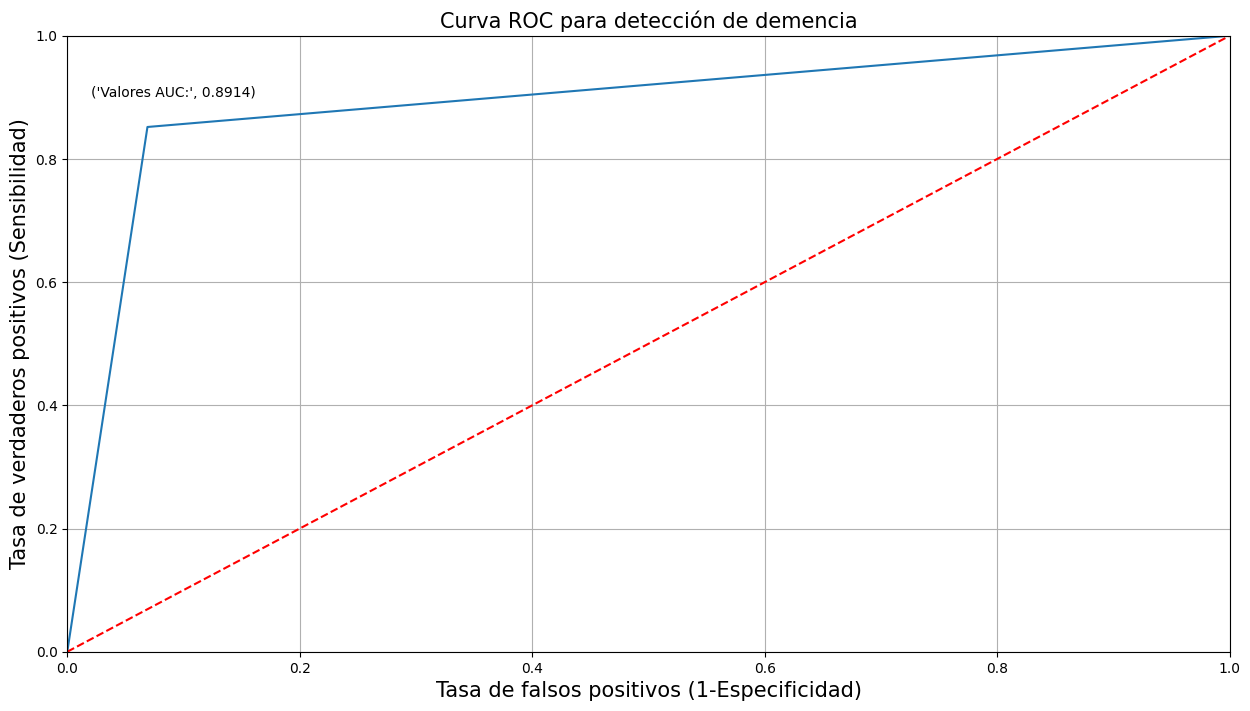

In [150]:
plot_roc(logreg)

In [197]:
update_score_card(algorithm_name = 'Regresión logística', model = logreg)
score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.892857,0.891443,0.931034,0.870968,0.900000
1,Logistic Regression -Significant Variables,0.955357,0.954545,1.000000,0.919355,0.957983
2,Logistic Regression -RFE,0.946429,0.945083,0.982759,0.919355,0.950000
3,Naive Bayes,0.964286,0.963602,0.982759,0.950000,0.966102
4,KNN,0.901786,0.903895,0.844828,0.960784,0.899083
5,knn-hyperparameter tuning,0.901786,0.912516,0.844828,0.960784,0.899083
6,Regresión logística,0.901786,0.912516,0.844828,0.960784,0.899083
7,Logistic Regression,0.901786,0.912516,0.844828,0.960784,0.899083
8,Regresión logística,0.901786,0.912516,0.844828,0.960784,0.899083


<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>La precisión de la regresión logística es del 92,8 % y el modelo parece estar funcionando bien para nuestro conjunto de datos</b>

### <span style="color:Red;font-size:1.4em;"><b>Mejorando el modelo considerando solo variables significativas </b></span>

In [152]:
x=logreg.pvalues
x

const   0.123585
M/F     0.054723
Age     0.441317
EDUC    0.062793
SES     0.004933
eTIV    0.168165
nWBV    0.699547
ASF     0.289046
MMSE    0.806317
CDR     0.000004
dtype: float64

In [153]:
sig_var=x[logreg.pvalues<0.05]
sig_var

SES   0.004933
CDR   0.000004
dtype: float64

In [154]:
imp_var=df[["M/F","SES","eTIV","ASF","CDR"]]


In [155]:
X=imp_var
y=df["Group"]
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.171049
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      255
Method:                           MLE   Df Model:                            5
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.7532
Time:                        20:58:44   Log-Likelihood:                -44.644
converged:                       True   LL-Null:                       -180.86
Covariance Type:            nonrobust   LLR p-value:                 8.376e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.0743     46.896      2.582      0.010      29.160     212.989
M/F           -1.2274      0.834     -1.472      0.141      -2.861       0.407
SES           -0.8501      0.328     -2.589      0.010      -1.494      -0.207
eTIV          -0.0416      0.016     -2.625      0.009      -0.073      -0.011
ASF          -42.6932     18.767     -2.275      0.023     -79.477      -5.910
CDR           -8.3035      1.397     -5.942      0.000     -11.042      -5.565
==============================================================================
"""

In [156]:
y_pred=logreg.predict(X_test)

In [157]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [158]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

### Informe de clasificación

In [159]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        57
           1       1.00      0.91      0.95        55

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112



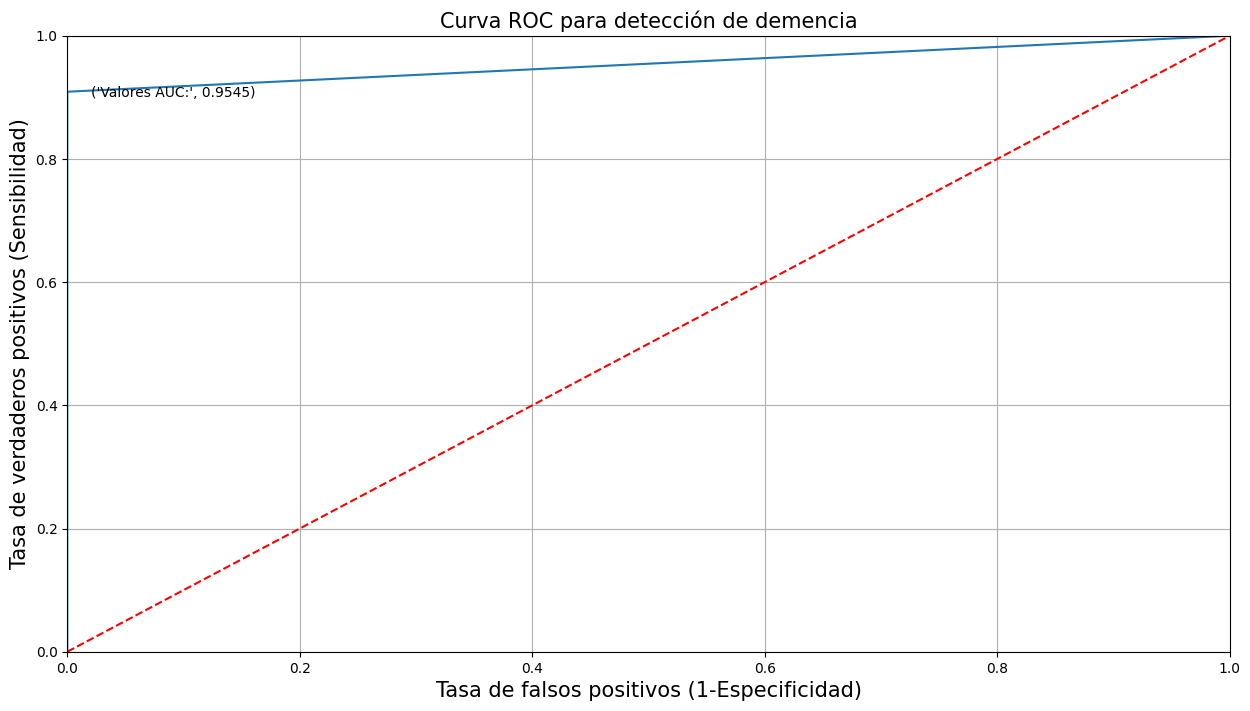

In [160]:
plot_roc(logreg)

In [198]:
update_score_card(algorithm_name = 'Regresión Logística -Variables Significativas', model = logreg)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.892857,0.891443,0.931034,0.870968,0.900000
1,Logistic Regression -Significant Variables,0.955357,0.954545,1.000000,0.919355,0.957983
2,Logistic Regression -RFE,0.946429,0.945083,0.982759,0.919355,0.950000
3,Naive Bayes,0.964286,0.963602,0.982759,0.950000,0.966102
4,KNN,0.901786,0.903895,0.844828,0.960784,0.899083
5,knn-hyperparameter tuning,0.901786,0.912516,0.844828,0.960784,0.899083
6,Regresión logística,0.901786,0.912516,0.844828,0.960784,0.899083
7,Logistic Regression,0.901786,0.912516,0.844828,0.960784,0.899083
8,Regresión logística,0.901786,0.912516,0.844828,0.960784,0.899083
9,Logistic Regression -Significant Variables,0.901786,0.912516,0.844828,0.960784,0.899083


<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>La precisión de la regresión logística: variables significativas ha mejorado el rendimiento del modelo, que es indicativo del valor de precisión del 93,7 %.</b>

### <span style="color:Red;font-size:1.4em;"><b>Selección de características usando RFE</b></span> 

In [162]:
from sklearn.feature_selection import RFE

In [163]:
X=df.drop(["Group"],axis=1)
y=df["Group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

linreg_rfe = LogisticRegression()

rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 6)

rfe_model = rfe_model.fit(X_train, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['M/F', 'EDUC', 'SES', 'ASF', 'MMSE', 'CDR'], dtype='object')


In [164]:
X2=df[['EDUC', 'SES', 'nWBV', 'ASF', 'MMSE', 'CDR']]
y2=df["Group"]
X2=sm.add_constant(X2)


In [165]:
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3)

In [166]:

logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

         Current function value: 0.180812
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.7391
Time:                        20:58:47   Log-Likelihood:                -47.192
converged:                      False   LL-Null:                       -180.89
Covariance Type:            nonrobust   LLR p-value:                 7.791e-55
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.5237   2.35e+07      3e-06      1.000   -4.61e+07    4.61e+07
EDUC          -0.2695      0.148     -1.817      0.069      -0.560       0.021
SES           -1.1479      0.409     -2.810      0.005      -1.949      -0.347
nWBV          -1.4601      8.311     -0.176      0.861     -17.750      14.830
ASF            4.1565      2.169      1.916      0.055      -0.094       8.407
MMSE         -31.3962   1.17e+07  -2.67e-06      1.000    -2.3e+07     2.3e+07
CDR           -7.4241      1.223     -6.068      0.000      -9.822      -5.026
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [167]:
y_pred=logreg.predict(X_test)

In [168]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [169]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

### Informe de clasificación

In [170]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.98      0.91      0.94        54

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



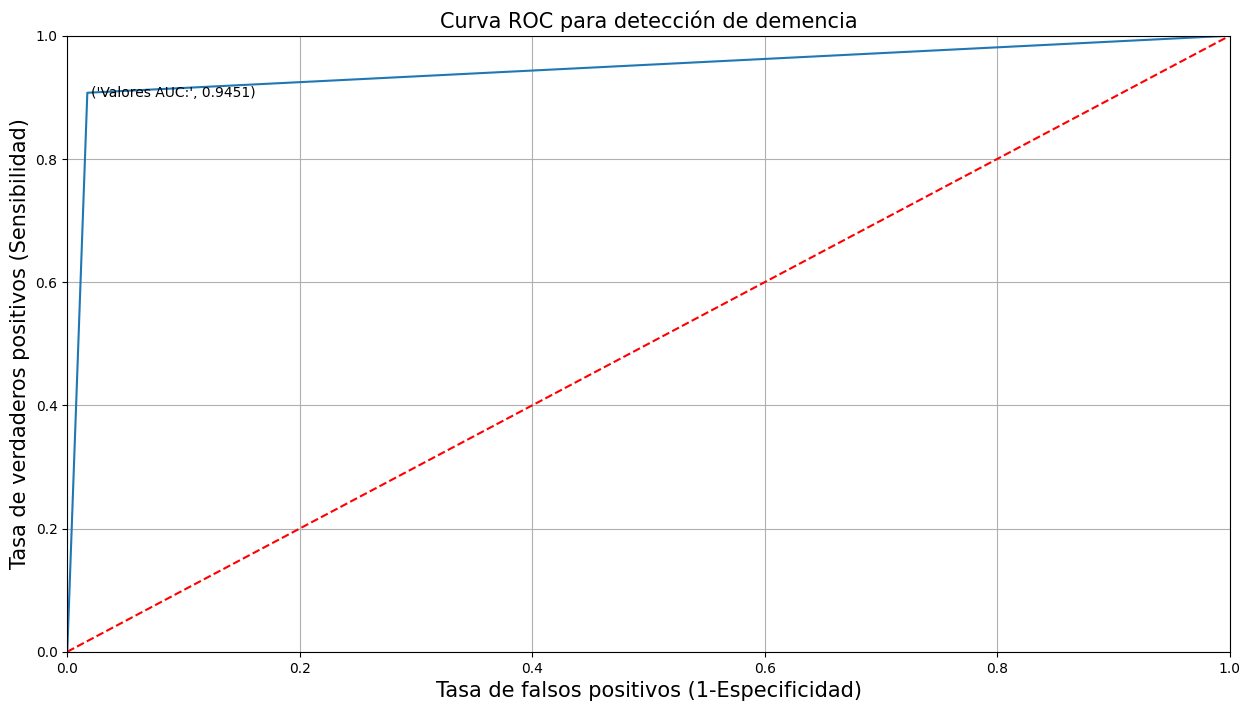

In [171]:
plot_roc(logreg)

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>La precisión es del 96 %. Este modelo con selección de funciones funciona mejor que los modelos anteriores</b>

In [199]:
correct=(TN+TP)/(TN+TP+FP+FN)
print("Clasificado correctamente :",correct*100)

Clasificado correctamente : 90.17857142857143


In [200]:
in_correct=(FN+FP)/(TN+TP+FP+FN)
print("Clasificado incorrectamente :",in_correct*100)

Clasificado incorrectamente : 9.821428571428571


In [174]:
update_score_card(algorithm_name = 'Regresión logística -RFE', model = logreg)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.892857,0.891443,0.931034,0.870968,0.900000
1,Logistic Regression -Significant Variables,0.955357,0.954545,1.000000,0.919355,0.957983
2,Logistic Regression -RFE,0.946429,0.945083,0.982759,0.919355,0.950000


<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>La precisión de la regresión logística - RFE se reduce al 51%.</b>

### <span style="color:Red;font-size:1.4em;"><b>Clasificador Naive Bayes</b></span>

In [175]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [176]:
y_pred=gnb_model.predict(X_test)

In [177]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

## Informe de clasificación

In [178]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.98      0.94      0.96        54

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



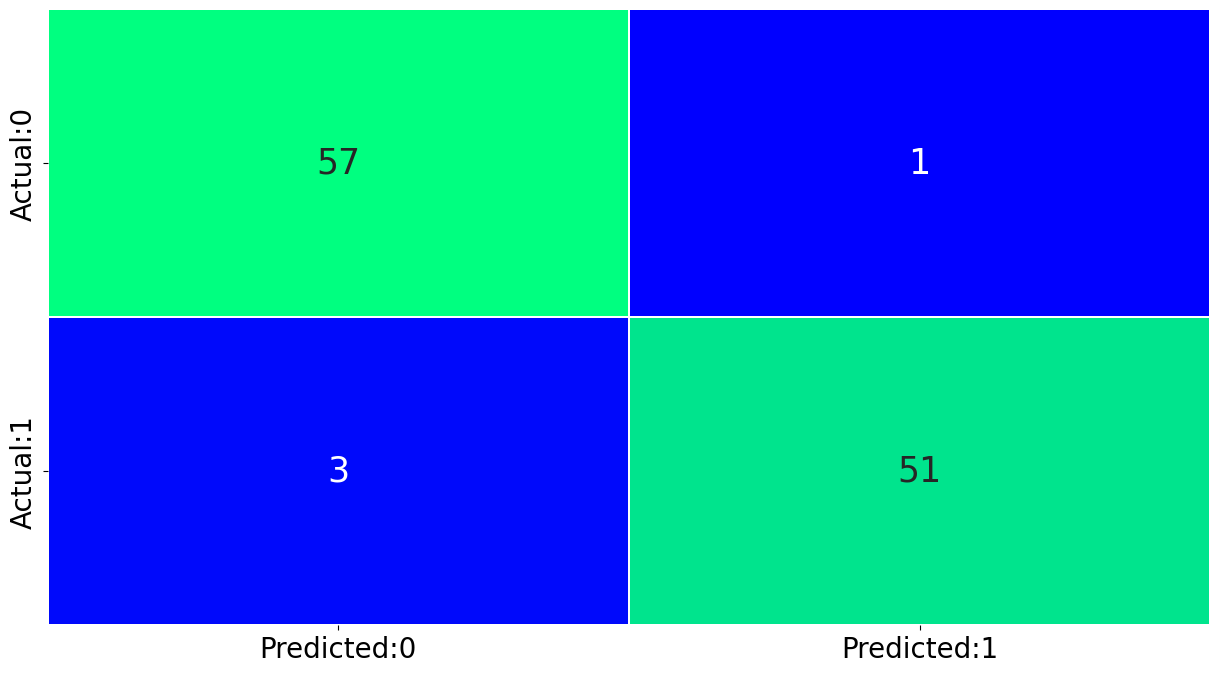

In [179]:
plot_confusion_matrix(gnb_model)

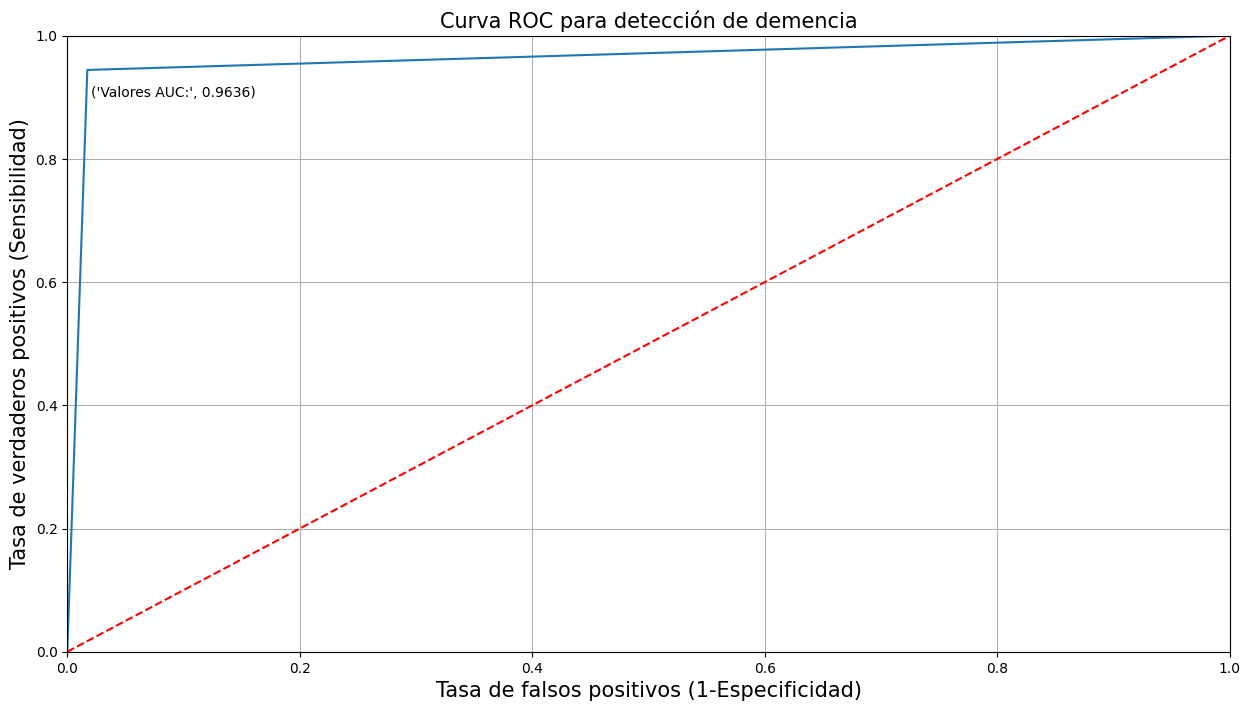

In [180]:

plot_roc(gnb_model)

<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b> El valor AUC es 0,93.</b>

In [181]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [182]:
update_score_card(algorithm_name = 'Naive Bayes', model = gnb_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.892857,0.891443,0.931034,0.870968,0.900000
1,Logistic Regression -Significant Variables,0.955357,0.954545,1.000000,0.919355,0.957983
2,Logistic Regression -RFE,0.946429,0.945083,0.982759,0.919355,0.950000
3,Naive Bayes,0.964286,0.963602,0.982759,0.950000,0.966102


<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>La precisión de Naive Bayes es del 93 %, pero la precisión es del 100 %.</b>

### <span style="color:Red;font-size:1.4em;"><b>Clasificacion KNearest Neighbour</b></span> 

In [183]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

In [184]:
y_pred=knn_model.predict(X_test)

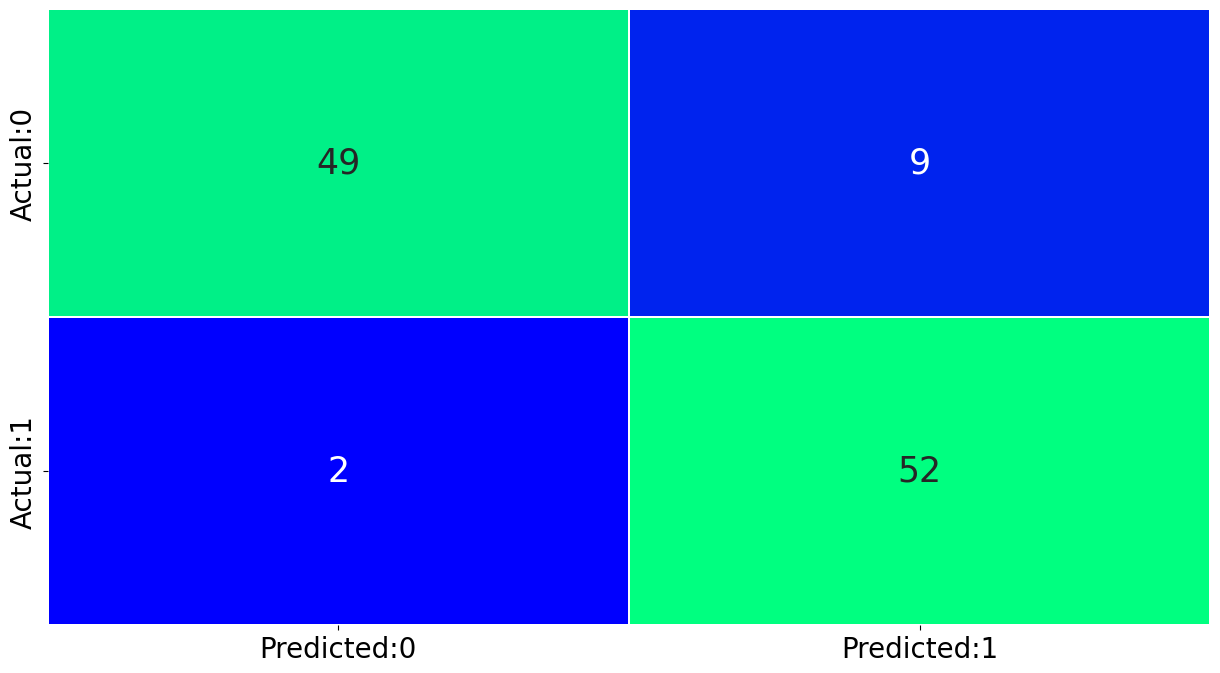

In [185]:
plot_confusion_matrix(knn_model)

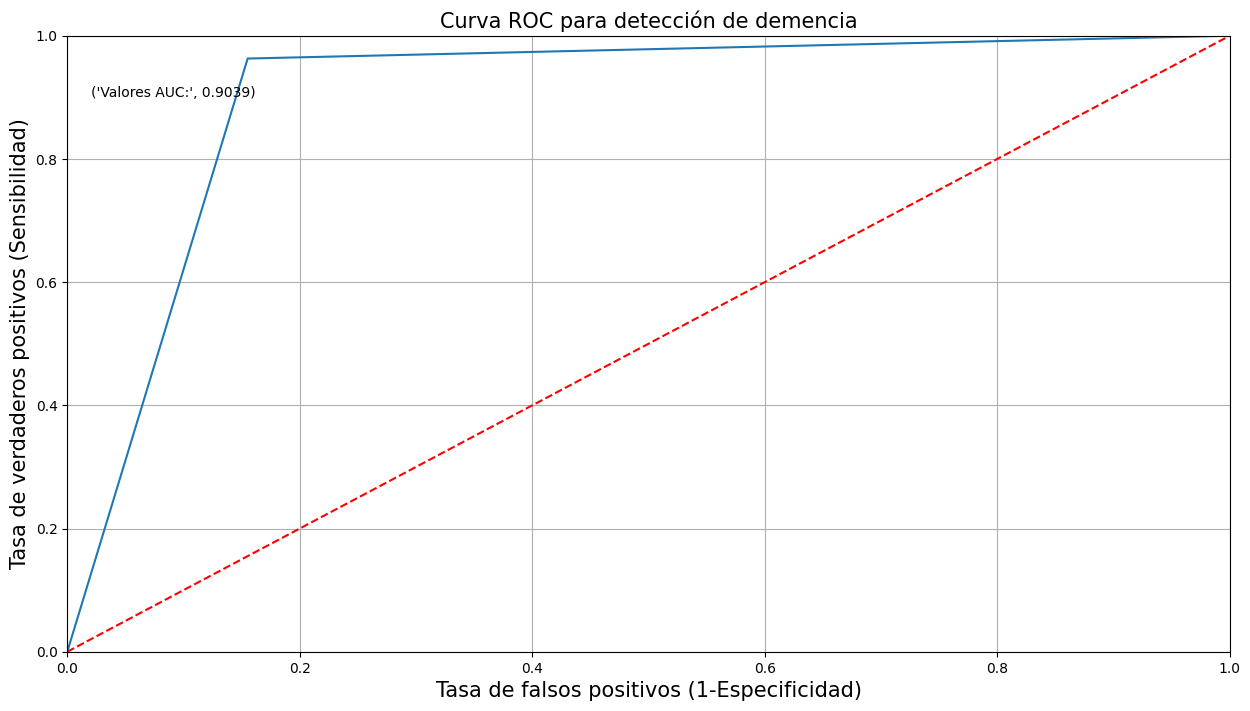

In [186]:
plot_roc(knn_model)

<span style="color:purple;font-size:1.4em;"><b>Analisis :</b> </span> 
<b>El valor de AUC es de 0.93.</b>

In [187]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [188]:
update_score_card(algorithm_name = 'KNN ', model = knn_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.892857,0.891443,0.931034,0.870968,0.900000
1,Logistic Regression -Significant Variables,0.955357,0.954545,1.000000,0.919355,0.957983
2,Logistic Regression -RFE,0.946429,0.945083,0.982759,0.919355,0.950000
3,Naive Bayes,0.964286,0.963602,0.982759,0.950000,0.966102
4,KNN,0.901786,0.903895,0.844828,0.960784,0.899083


<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>La precisión de KNN es del 93 %, pero la precisión es del 94 %.</b>

### <span style="color:Red;font-size:1.4em;"><b>Ajuste de hiperparámetros mediante el clasificador KNN</b></span>

In [189]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean']}
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Los mejores parámetros para la clasificacion KNN: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 1} 



In [190]:
y_pred=knn_grid.predict(X_test)

In [191]:
print("la precisión es de :",accuracy_score(y_test,y_pred))

The accuracy is : 0.9107142857142857


In [192]:
update_score_card(algorithm_name = 'knn-hyperparameter tuning', model = knn_grid)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.892857,0.891443,0.931034,0.870968,0.900000
1,Logistic Regression -Significant Variables,0.955357,0.954545,1.000000,0.919355,0.957983
2,Logistic Regression -RFE,0.946429,0.945083,0.982759,0.919355,0.950000
3,Naive Bayes,0.964286,0.963602,0.982759,0.950000,0.966102
4,KNN,0.901786,0.903895,0.844828,0.960784,0.899083
5,knn-hyperparameter tuning,0.901786,0.912516,0.844828,0.960784,0.899083


<span style="color:purple;font-size:1.4em;"><b>Analisis : </b></span> 
<b>La precisión de KNN: el ajuste de hiperparámetros es del 93 %, pero la precisión es del 94 %.</b>

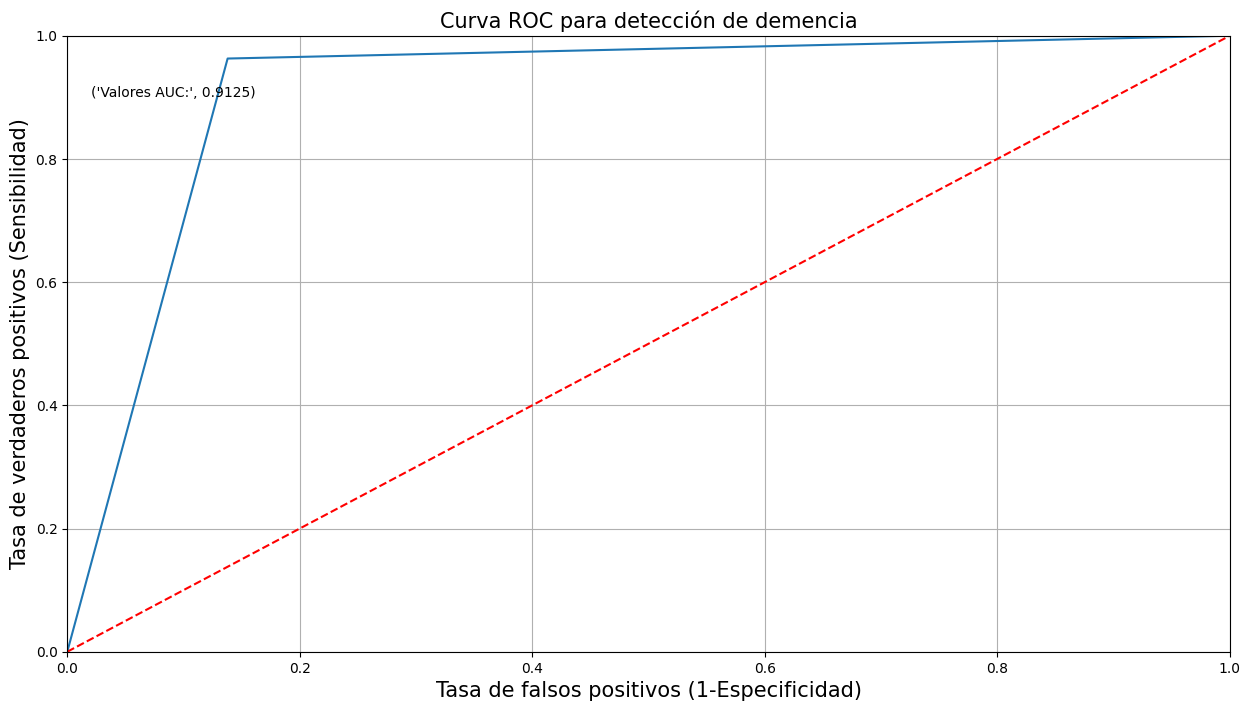

In [193]:
plot_roc(knn_grid)

<span style="color:purple;font-size:1.4em;"><b>Analisis : </b></span> 
<b>El valor de AUC es 0.98.</b>


### <span style="color:Red;font-size:1.4em;"><b> Clasificador DecisionTree</b></span> 

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image  

In [202]:
X1=df.drop(["Group"],axis=1)
y1=df["Group"]

In [203]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=10)


In [204]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini',splitter='best',max_depth=3, random_state = 10)
dtree = decision_tree_classification.fit(X_train, y_train)

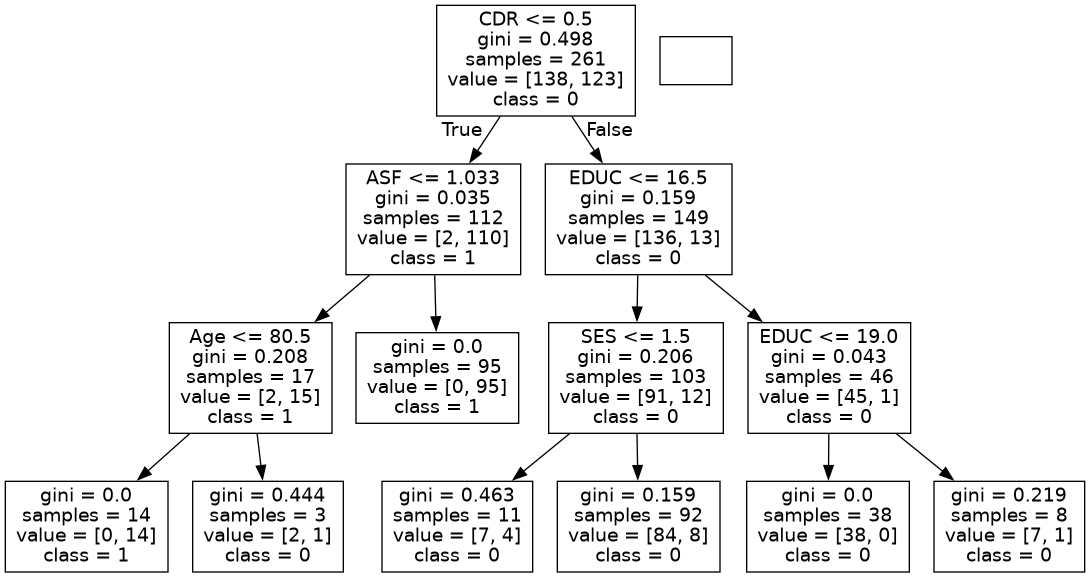

In [205]:
labels = X_train.columns

dot_data = tree.export_graphviz(dtree, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

In [206]:
y_pred=dtree.predict(X_test)

In [207]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [208]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



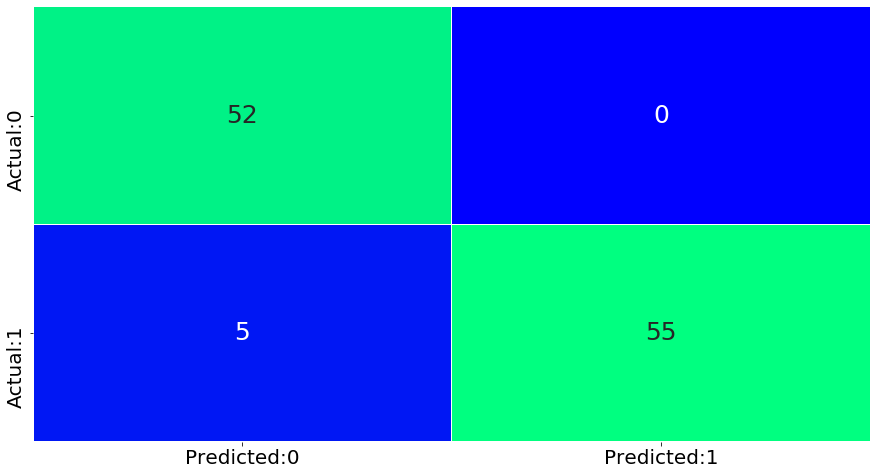

In [ ]:
plot_confusion_matrix(dtree)

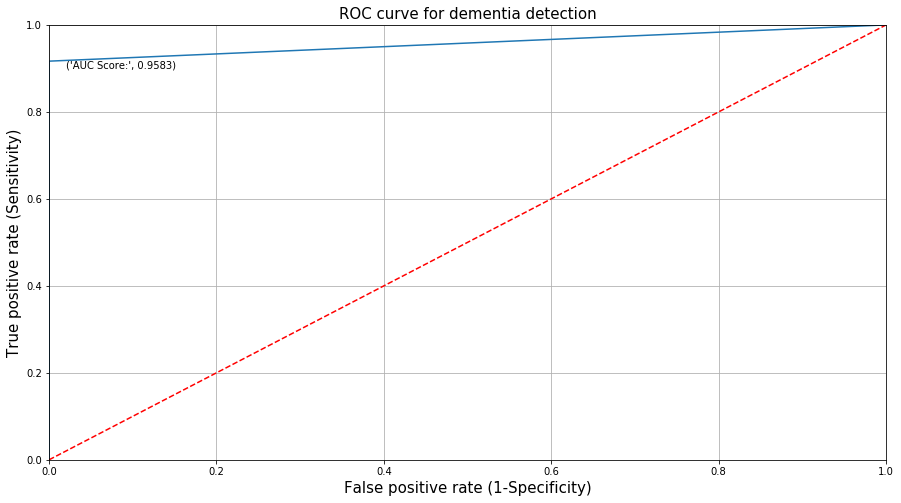

In [ ]:
plot_roc(dtree)

<span style="color:purple;font-size:1.4em;"><b>Analisis : </b></span> 
<b>El valor de AUC es 0.95.</b>

In [ ]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [ ]:
update_score_card(algorithm_name = 'Decision Tree ', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128


<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>La precisión del árbol de decisiones es del 95 % y la precisión es del 100 %.</b>

### <span style="color:Red;font-size:1.4em;"><b>Ajustes de Parametros de decision tree</b></span> 

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                  
                     'min_samples_split': range(2,10)
                    
                     }]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2} 



In [ ]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),   
                                 min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

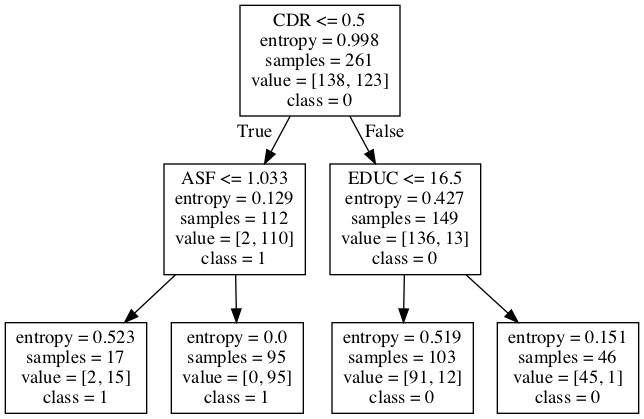

In [ ]:
labels = X_train.columns

dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

In [ ]:
y_pred=dt_model.predict(X_test)

In [ ]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

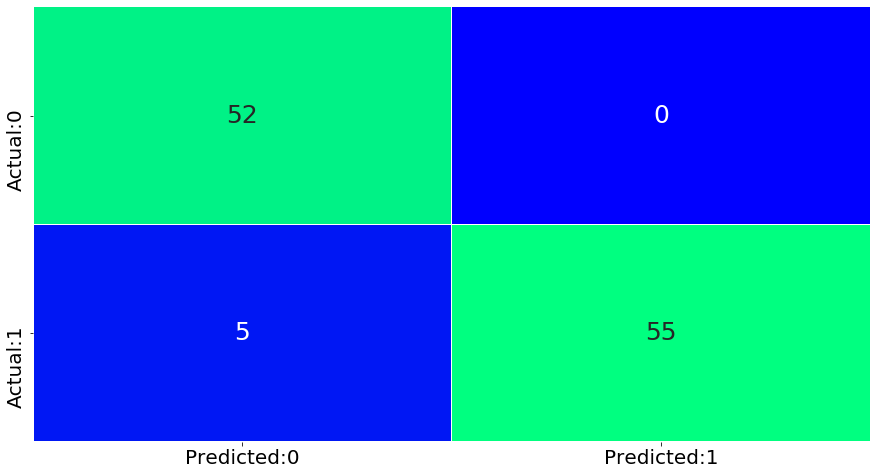

In [ ]:
plot_confusion_matrix(dt_model)

In [ ]:
update_score_card(algorithm_name = 'Decision Tree-hyperparameter tuning ', model = dt_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128


<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>La precisión del árbol de decisiones: el ajuste de hiperparámetros es del 95 % y la precisión es del 100 %.</b>

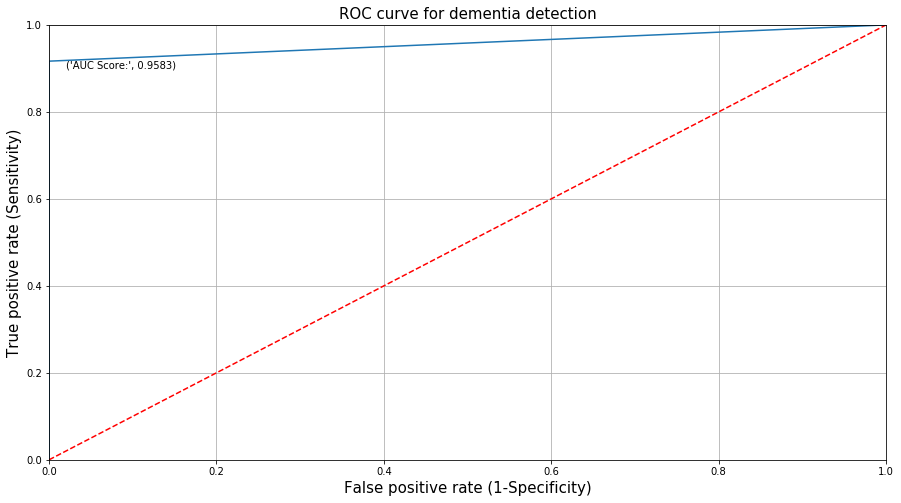

In [ ]:
plot_roc(dt_model)

<span style="color:purple;font-size:1.4em;"><b>Analisis :</b> </span> 
<b>El valor de AUC es 0.95.</b>

In [ ]:
score=cross_val_score(dt_model,X_train,y_train,cv=10,scoring="accuracy")
score.mean()

0.9425925925925925


 ### <span style="color:Red;font-size:1.4em;"><b> Clasificador de Random Forest</b></span>

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [ ]:
y_pred=rf_model.predict(X_test)

### Clasificacion Report-Train_data

In [ ]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       138
           1       1.00      0.98      0.99       123

    accuracy                           0.99       261
   macro avg       0.99      0.99      0.99       261
weighted avg       0.99      0.99      0.99       261



### Clasificacion Report-Test_data

In [ ]:
test_report = get_test_report(rf_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       1.00      0.93      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



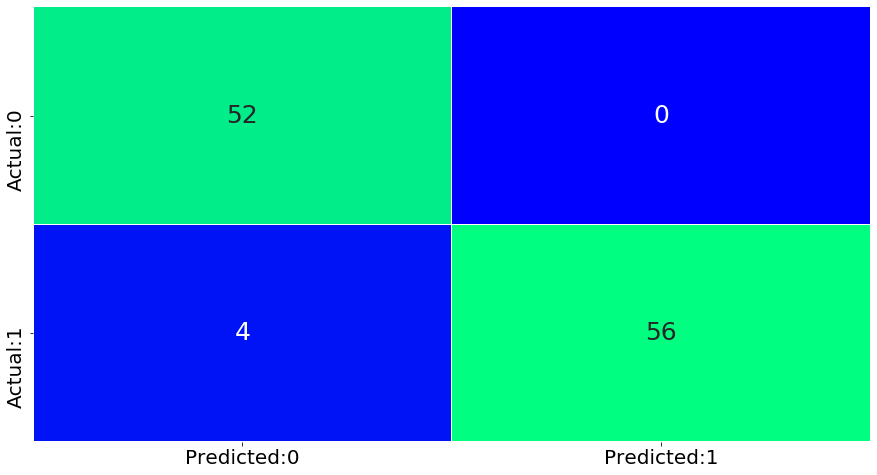

In [ ]:
plot_confusion_matrix(rf_model)

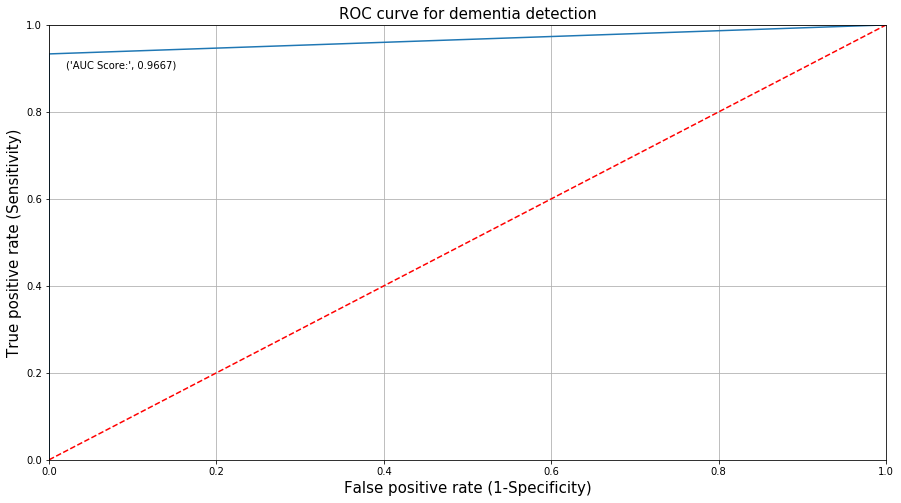

In [ ]:
plot_roc(rf_model)

<span style="color:purple;font-size:1.4em;"><b>Analisis : </b></span> 
<b>El valor AUC es de 0.96.</b>

In [ ]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [ ]:
update_score_card(algorithm_name = 'Random Forest', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>La precisión de Random Forest es del 96 % y la precisión es del 100 %.</b>


### <span style="color:Red;font-size:1.4em;"><b> Random forest - con mejora de parametros </b></span> 

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')
 

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10} 



### Informe de clasificación

In [ ]:
# type your code here
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.95      0.97        60

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



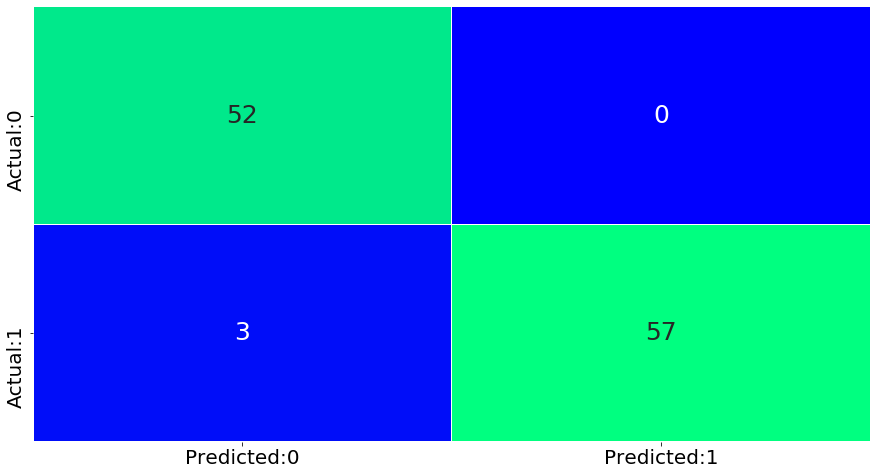

In [ ]:
plot_confusion_matrix(rf_model)

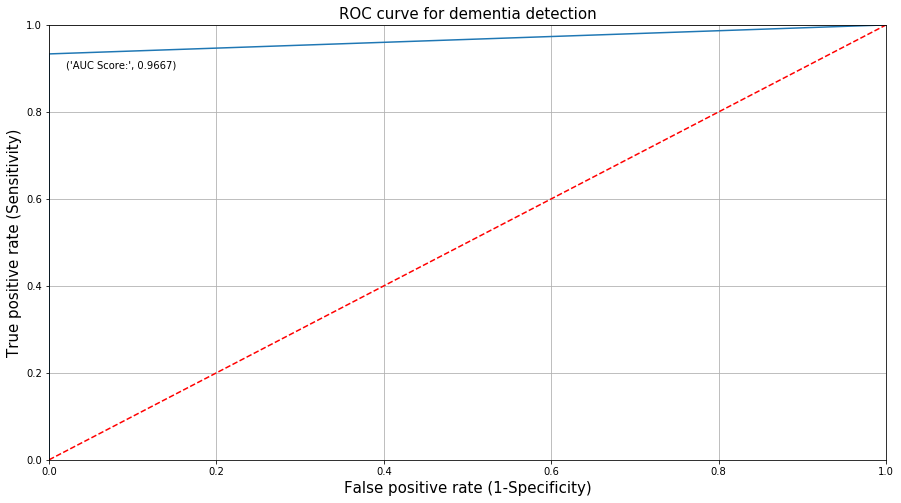

In [ ]:
plot_roc(rf_model)

<span style="color:purple;font-size:1.4em;"><b>Analisis : </b></span> 
<b>EL valor de AUC es de 0.96.</b>

In [ ]:
update_score_card(algorithm_name = 'Random Forest-hyperparameter tuning', model = rf_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>La precisión de Random Forest: el ajuste de hiperparámetros sigue siendo del 96 % y la precisión es del 100 %.</b>



### <span style="color:Red;font-size:1.4em;"><b>  ADABOOST </b></span> 

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [ ]:
y_pred=ada_model.predict(X_test)

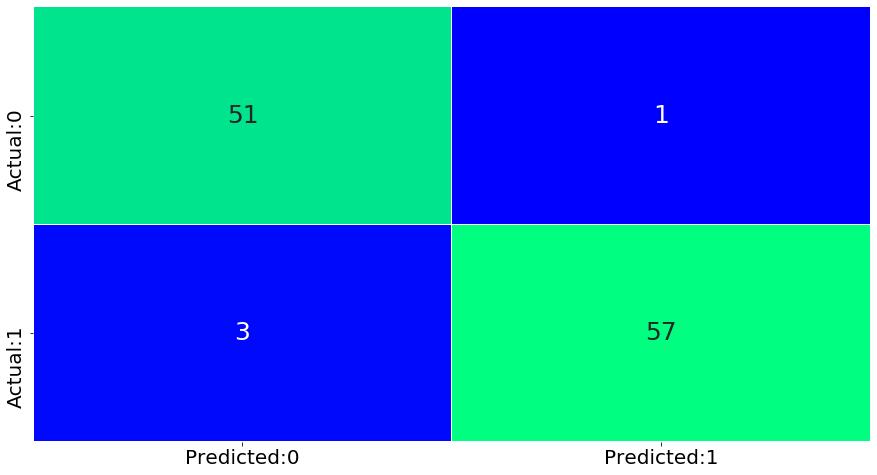

In [ ]:
plot_confusion_matrix(ada_model)

### Informe de clasificación

In [ ]:
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.98      0.95      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.96      0.96      0.96       112



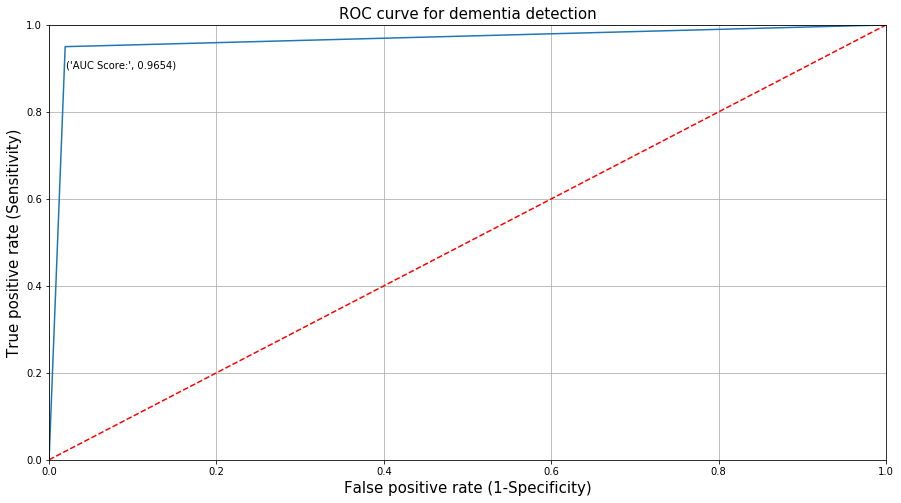

In [ ]:
plot_roc(ada_model)

<span style="color:purple;font-size:1.4em;"><b>Analisis : </b></span> 
<b>EL valor de AUC es de 0.88.</b>

In [ ]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [ ]:
update_score_card(algorithm_name = 'ADA Boost', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Analisis: </b></span>
<b>La precisión de ADA Boost es del 88 % y la precisión es del 90 %.</b>


### <span style="color:Red;font-size:1.4em;"><b>  Gradient Boosting </b></span> 

In [ ]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [ ]:
y_pred=gboost_model.predict(X_test)

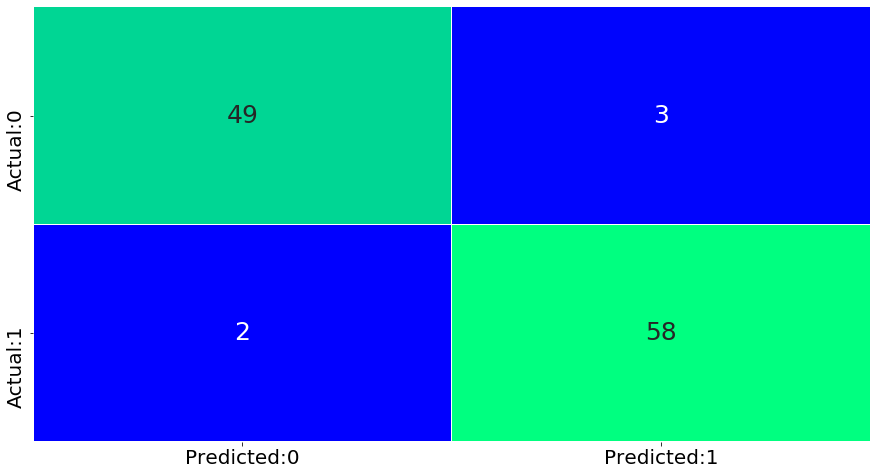

In [ ]:
plot_confusion_matrix(gboost_model)

### Informe de clasificación

In [ ]:
test_report = get_test_report(gboost_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.95      0.97      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112



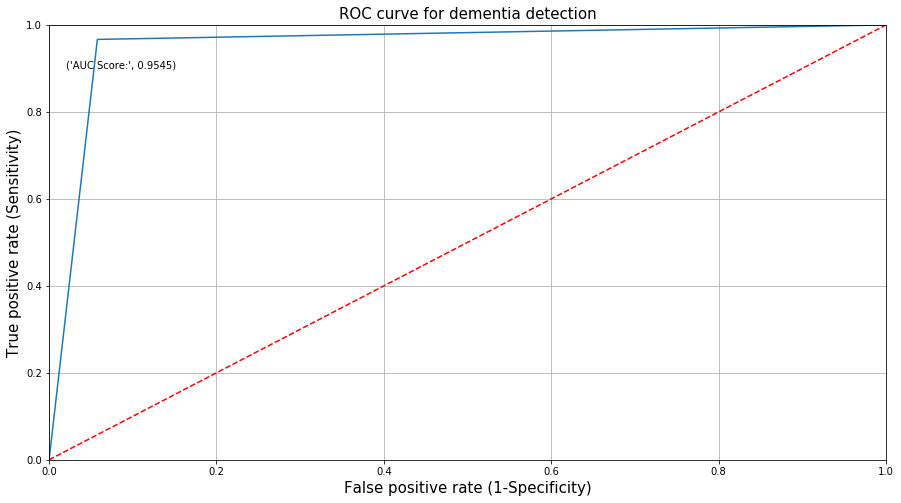

In [ ]:
plot_roc(gboost_model)

<span style="color:purple;font-size:1.4em;"><b>Analisis :</b> </span> 
<b>El valor de AUC es de 0.89.</b>

In [ ]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [ ]:
update_score_card(algorithm_name = 'Gradient Boosting', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>La precisión del realce de degradado es del 89 %, pero la precisión es del 88 %.</b>


### <span style="color:Red;font-size:1.4em;"><b>  XGBOOST </b></span> 

In [ ]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(X_train, y_train)

XGBClassifier(gamma=1, max_depth=10)

In [ ]:
y_pred=xgb_model.predict(X_test)

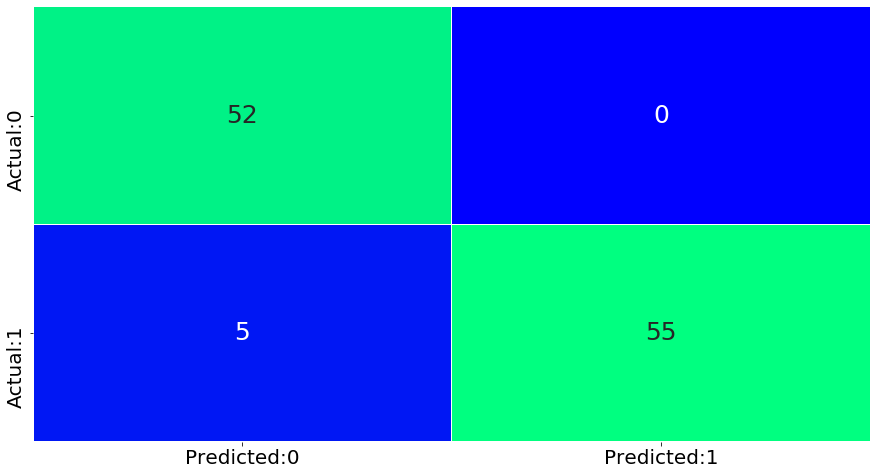

In [ ]:

plot_confusion_matrix(xgb_model)

### Informe de clasificación

In [ ]:
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



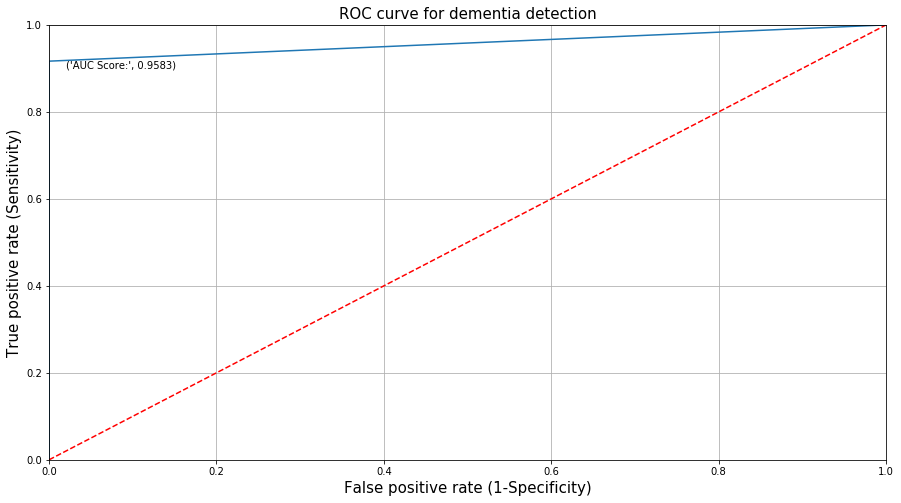

In [ ]:
plot_roc(xgb_model)

<span style="color:purple;font-size:1.4em;"><b>Analisis : </b></span> 
<b>El valor de AUC es de 0.93.</b>

In [ ]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [ ]:
update_score_card(algorithm_name = 'XG Boost', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>La precisión de XG Boost es del 94 % y la precisión es del 100 %.</b>


### <span style="color:Red;font-size:1.4em;"><b>   Mejora de parametros usando XGBoost </b></span> 

In [ ]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}


xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.6, 'max_depth': 4} 



In [ ]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.98      0.95      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.96      0.96      0.96       112



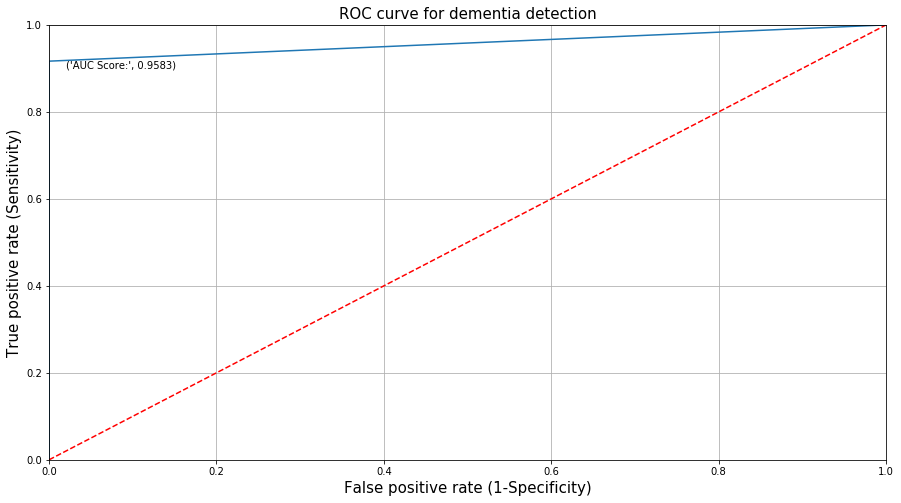

In [ ]:
plot_roc(xgb_model)

<span style="color:purple;font-size:1.4em;"><b>Analisis : </b></span> 
<b>El valor de AUC es de 0.93.</b>

In [ ]:
update_score_card(algorithm_name = 'XG Boost-tuning hyperparameters', model = xgb_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Analisis:</b> </span>
<b>La precisión de XG Boost: el ajuste de hiperparámetros se mantiene en un 94 % y la precisión en un 100 %.</b>


### <span style="color:Red;font-size:1.4em;"><b>  Funciones importantes usando XGBOOST </b></span> 

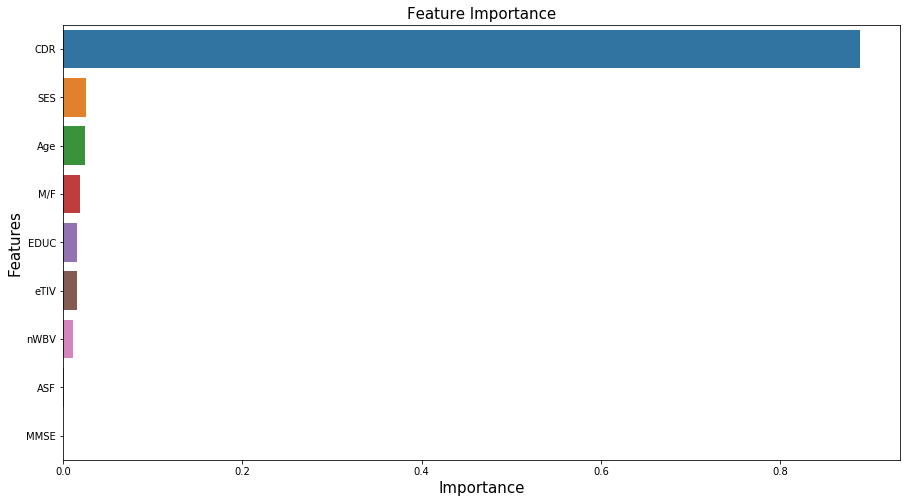

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [ ]:
df.columns

Index(['M/F', 'Age', 'EDUC', 'SES', 'eTIV', 'nWBV', 'ASF', 'Group', 'MMSE',
       'CDR'],
      dtype='object')

In [ ]:
X1=df[["nWBV","eTIV","EDUC","M/F","Age","SES","CDR"]]
y1=df["Group"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=10)

In [ ]:
xgb_model1 = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model1.fit(X_train, y_train)

XGBClassifier(gamma=1, max_depth=10)

In [ ]:
y_pred=xgb_model1.predict(X_test)

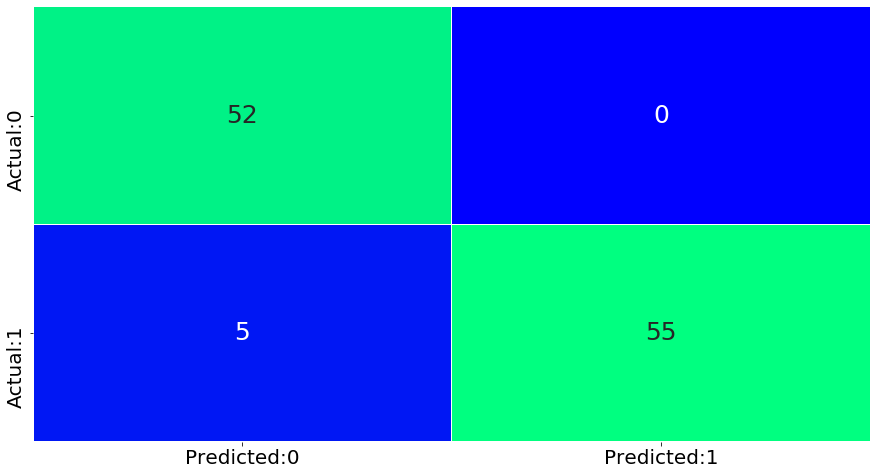

In [ ]:
plot_confusion_matrix(xgb_model1)

### Informe de clasificación

In [ ]:
test_report = get_test_report(xgb_model1)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



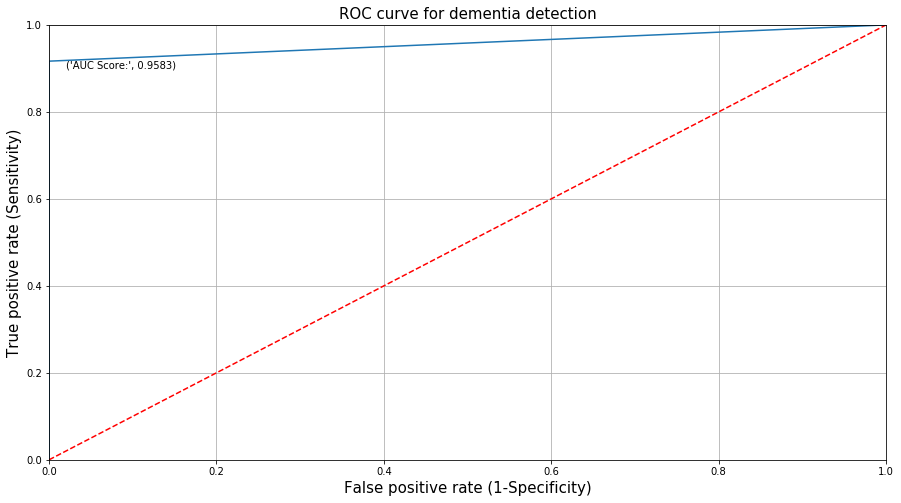

In [ ]:
plot_roc(xgb_model1)

In [ ]:
update_score_card(algorithm_name = 'XG Boost-imp features', model = xgb_model1)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


 
### <span style="color:Red;font-size:1.4em;"><b> Clasificacion STACKING </b></span> 

In [ ]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

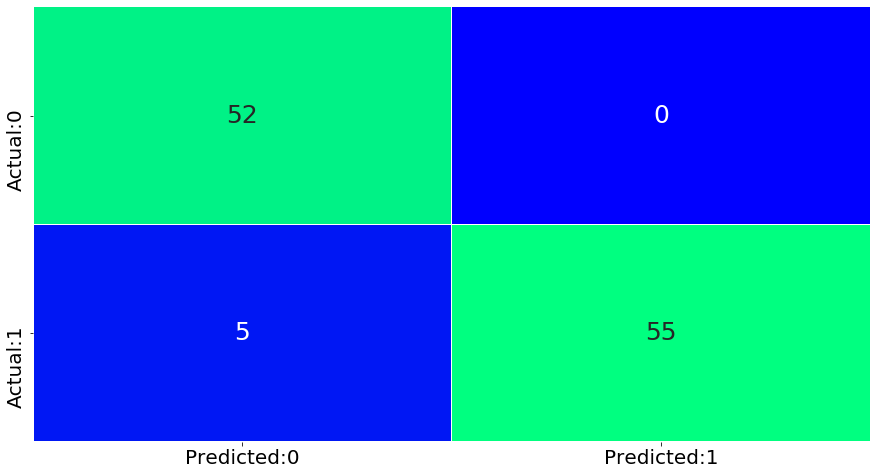

In [ ]:
plot_confusion_matrix(stack_model)

### Clasificacion Report-train_data

In [ ]:
test_report = get_train_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       138
           1       0.98      0.89      0.94       123

    accuracy                           0.94       261
   macro avg       0.95      0.94      0.94       261
weighted avg       0.95      0.94      0.94       261



### Clasificacion Report-test_data

In [ ]:
test_report = get_test_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [ ]:
update_score_card(algorithm_name = 'Stacking classifier', model = stack_model)
score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<b>Información clave: <br></b>

1.La mayoría de los casos de demencia observados en el grupo de edad de 70 a 80 años.<br>
2. Los hombres desarrollan demencia a una edad temprana antes de los 60 años, mientras que las mujeres tienen tendencia a la demencia a una edad posterior a los 60 años<br>
3. En los hombres, la demencia comienza con un nivel educativo de 4 años y es más frecuente con un nivel educativo de 12 años y 16 años y también puede extenderse hasta más de 20 años de nivel educativo, mientras que en las mujeres la demencia comienza después de los 5 años de nivel educativo. y más prevalente alrededor de los 12 o 13 años de nivel educativo y comenzó a disminuir a medida que aumenta el nivel educativo de las mujeres<br>
4. La demencia prevalece en los hombres que tienen el nivel socioeconómico más alto y más bajo, mientras que las mujeres que tienen un nivel socioeconómico medio tienen más casos de demencia.<br>
5. Los valores más bajos de ASF cercanos a 1 corresponden a casos de demencia grave.<br>
6. La demencia grave se diagnostica después de un mínimo de 3 visitas.<br>